In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
default_data = pd.read_excel('./dataset/dataset.xls', skiprows=1)

In [4]:
default_data.drop('ID', axis=1, inplace=True)

In [5]:
default_data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

#### EDA

In [6]:
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
# #convert datatypes to integer
# for col in df.select_dtypes(include=[object]).columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce', downcast = 'integer')

In [8]:
# #convert float64 datatype to int64
# df = df.astype({col: 'int64' for col in df.select_dtypes(include = ['float64']).columns})

In [9]:
default_data.rename(columns={'default payment next month': 'Y'}, inplace=True)

In [10]:
default_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Y  
0             0         0         0         0  1  
1          1000      1000         0      2000  1  
2          1000      1000      1000      5000  0  
3          1200      1100      1069      1000  0  
4         10000      9000       689       679  0  
...         ...       ...       ...       ... ..  
29995      5003      3047      5000      1000  0  
29996      8998       129         0         0  0  
29997     22000      4200      2000      3100  1  
29998      1178      1926     52964      1804  1  
29999      1430      1000      1000      1000  1  

[30000 rows x 24 columns]

#### Plots

In [25]:
import matplotlib.font_manager as fm

path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name
plt.rcParams['font.size'] = 12

# set figure size to 14, 6 in rcparams
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.facecolor'] = '#f7f6f2'
plt.rcParams['axes.facecolor'] = '#f7f6f2'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.55
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2

# xtick text size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [52]:
# set default white grid background
sns.set(style="whitegrid")

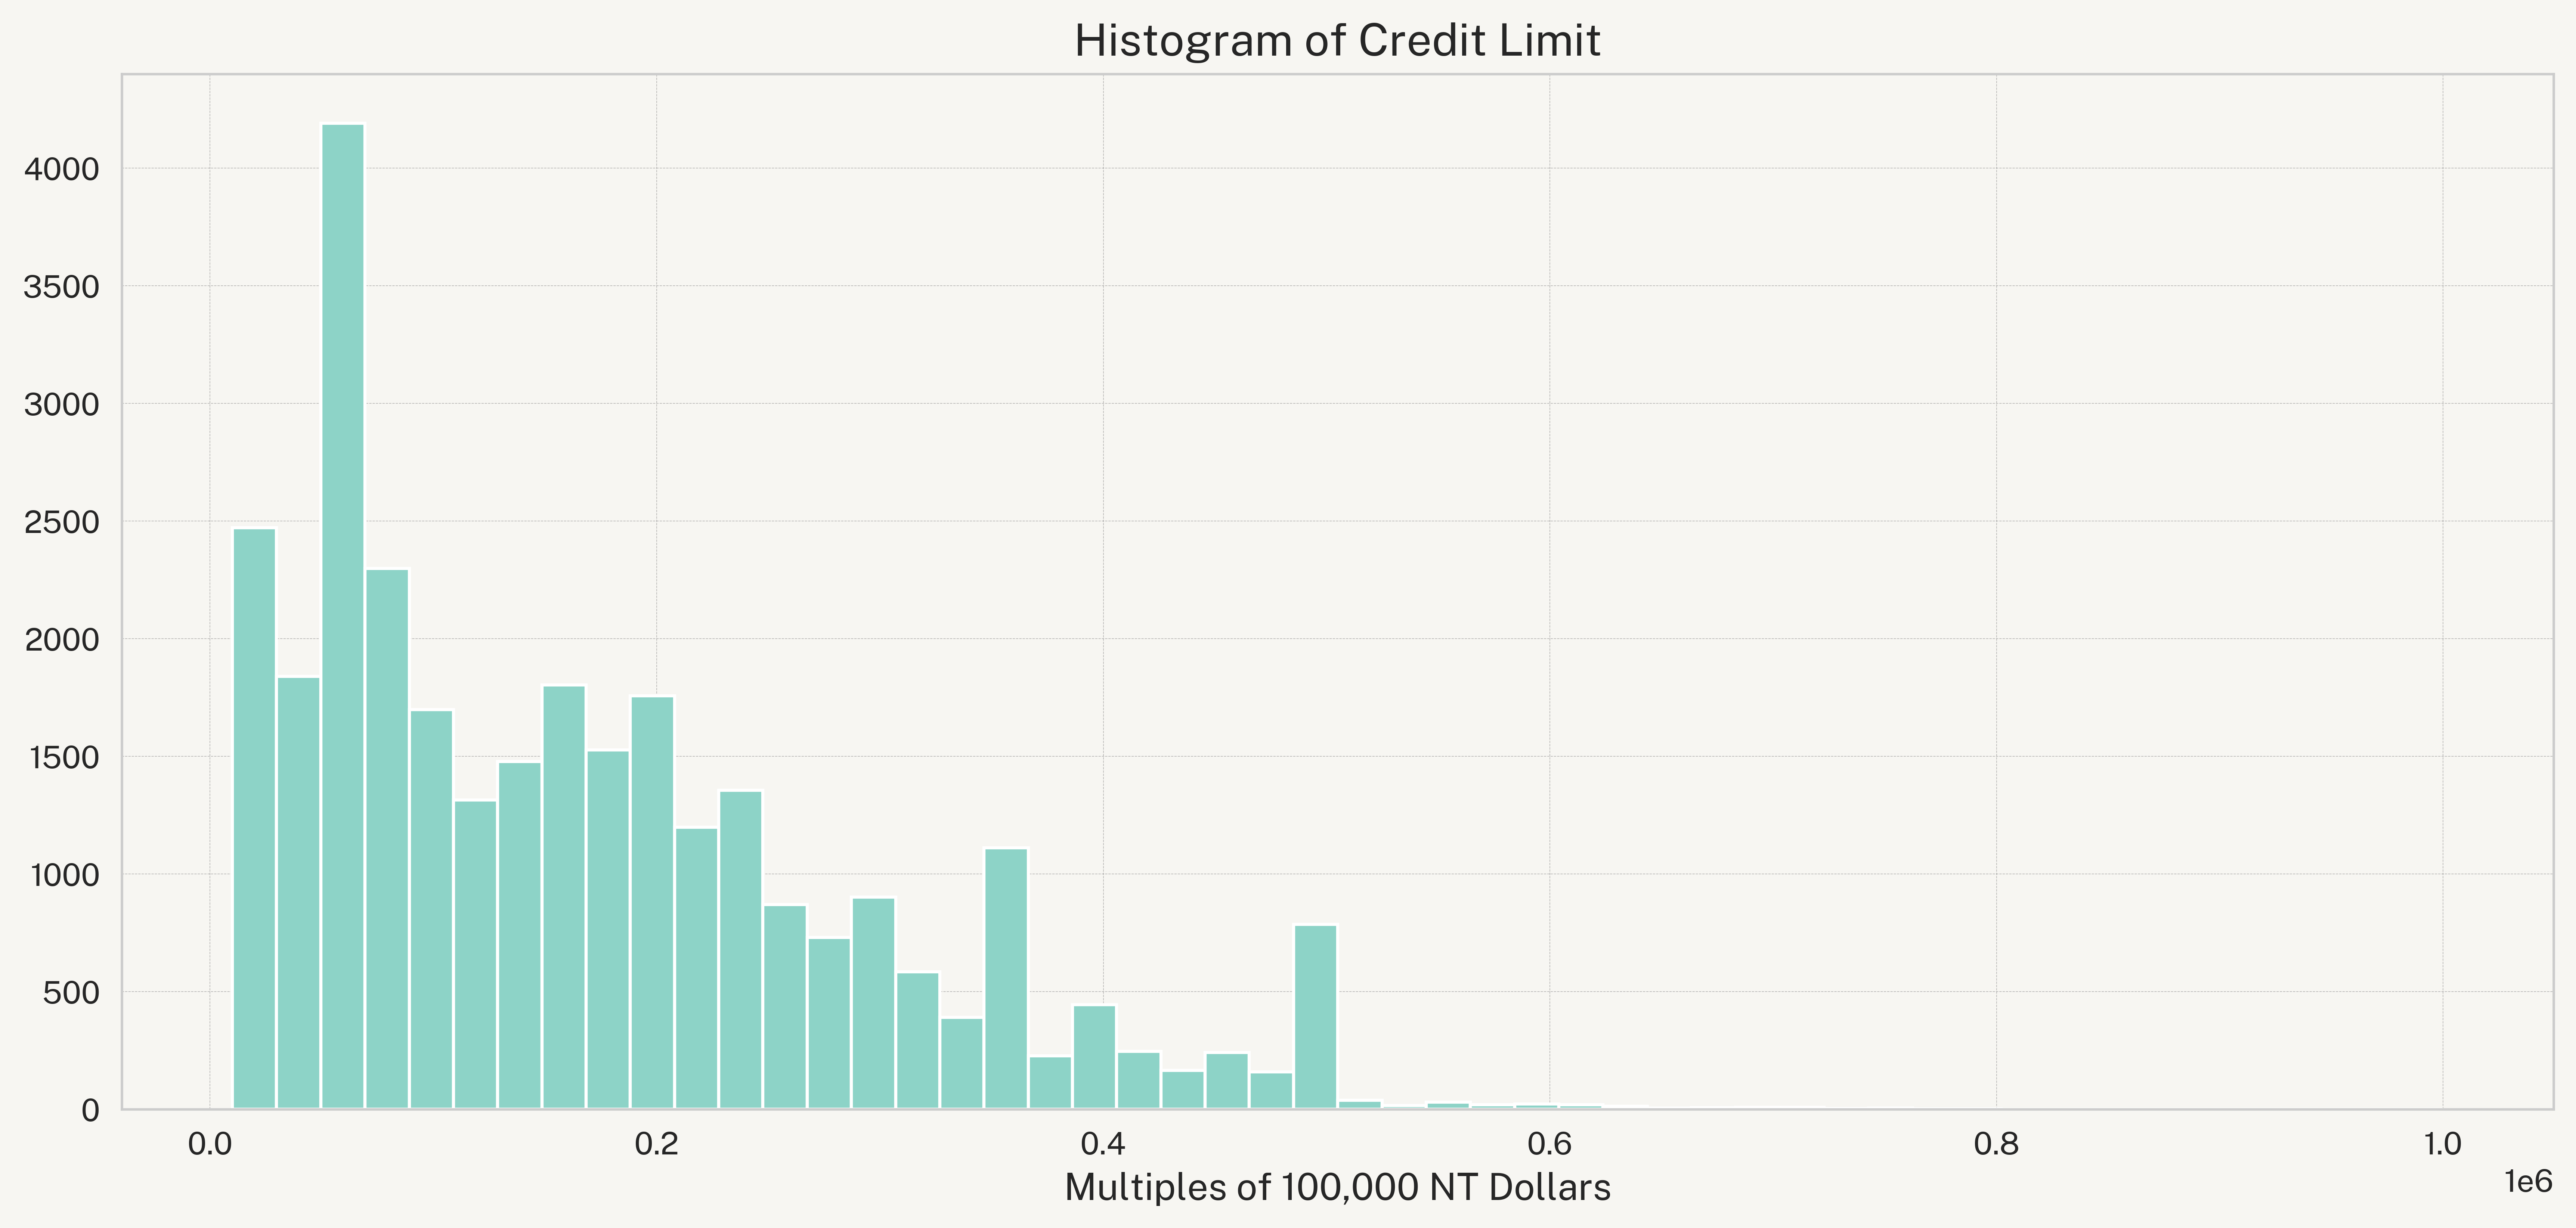

In [26]:
default_data['LIMIT_BAL'].hist(bins=50)
plt.title('Histogram of Credit Limit')
plt.xlabel('Multiples of 100,000 NT Dollars')
plt.show()

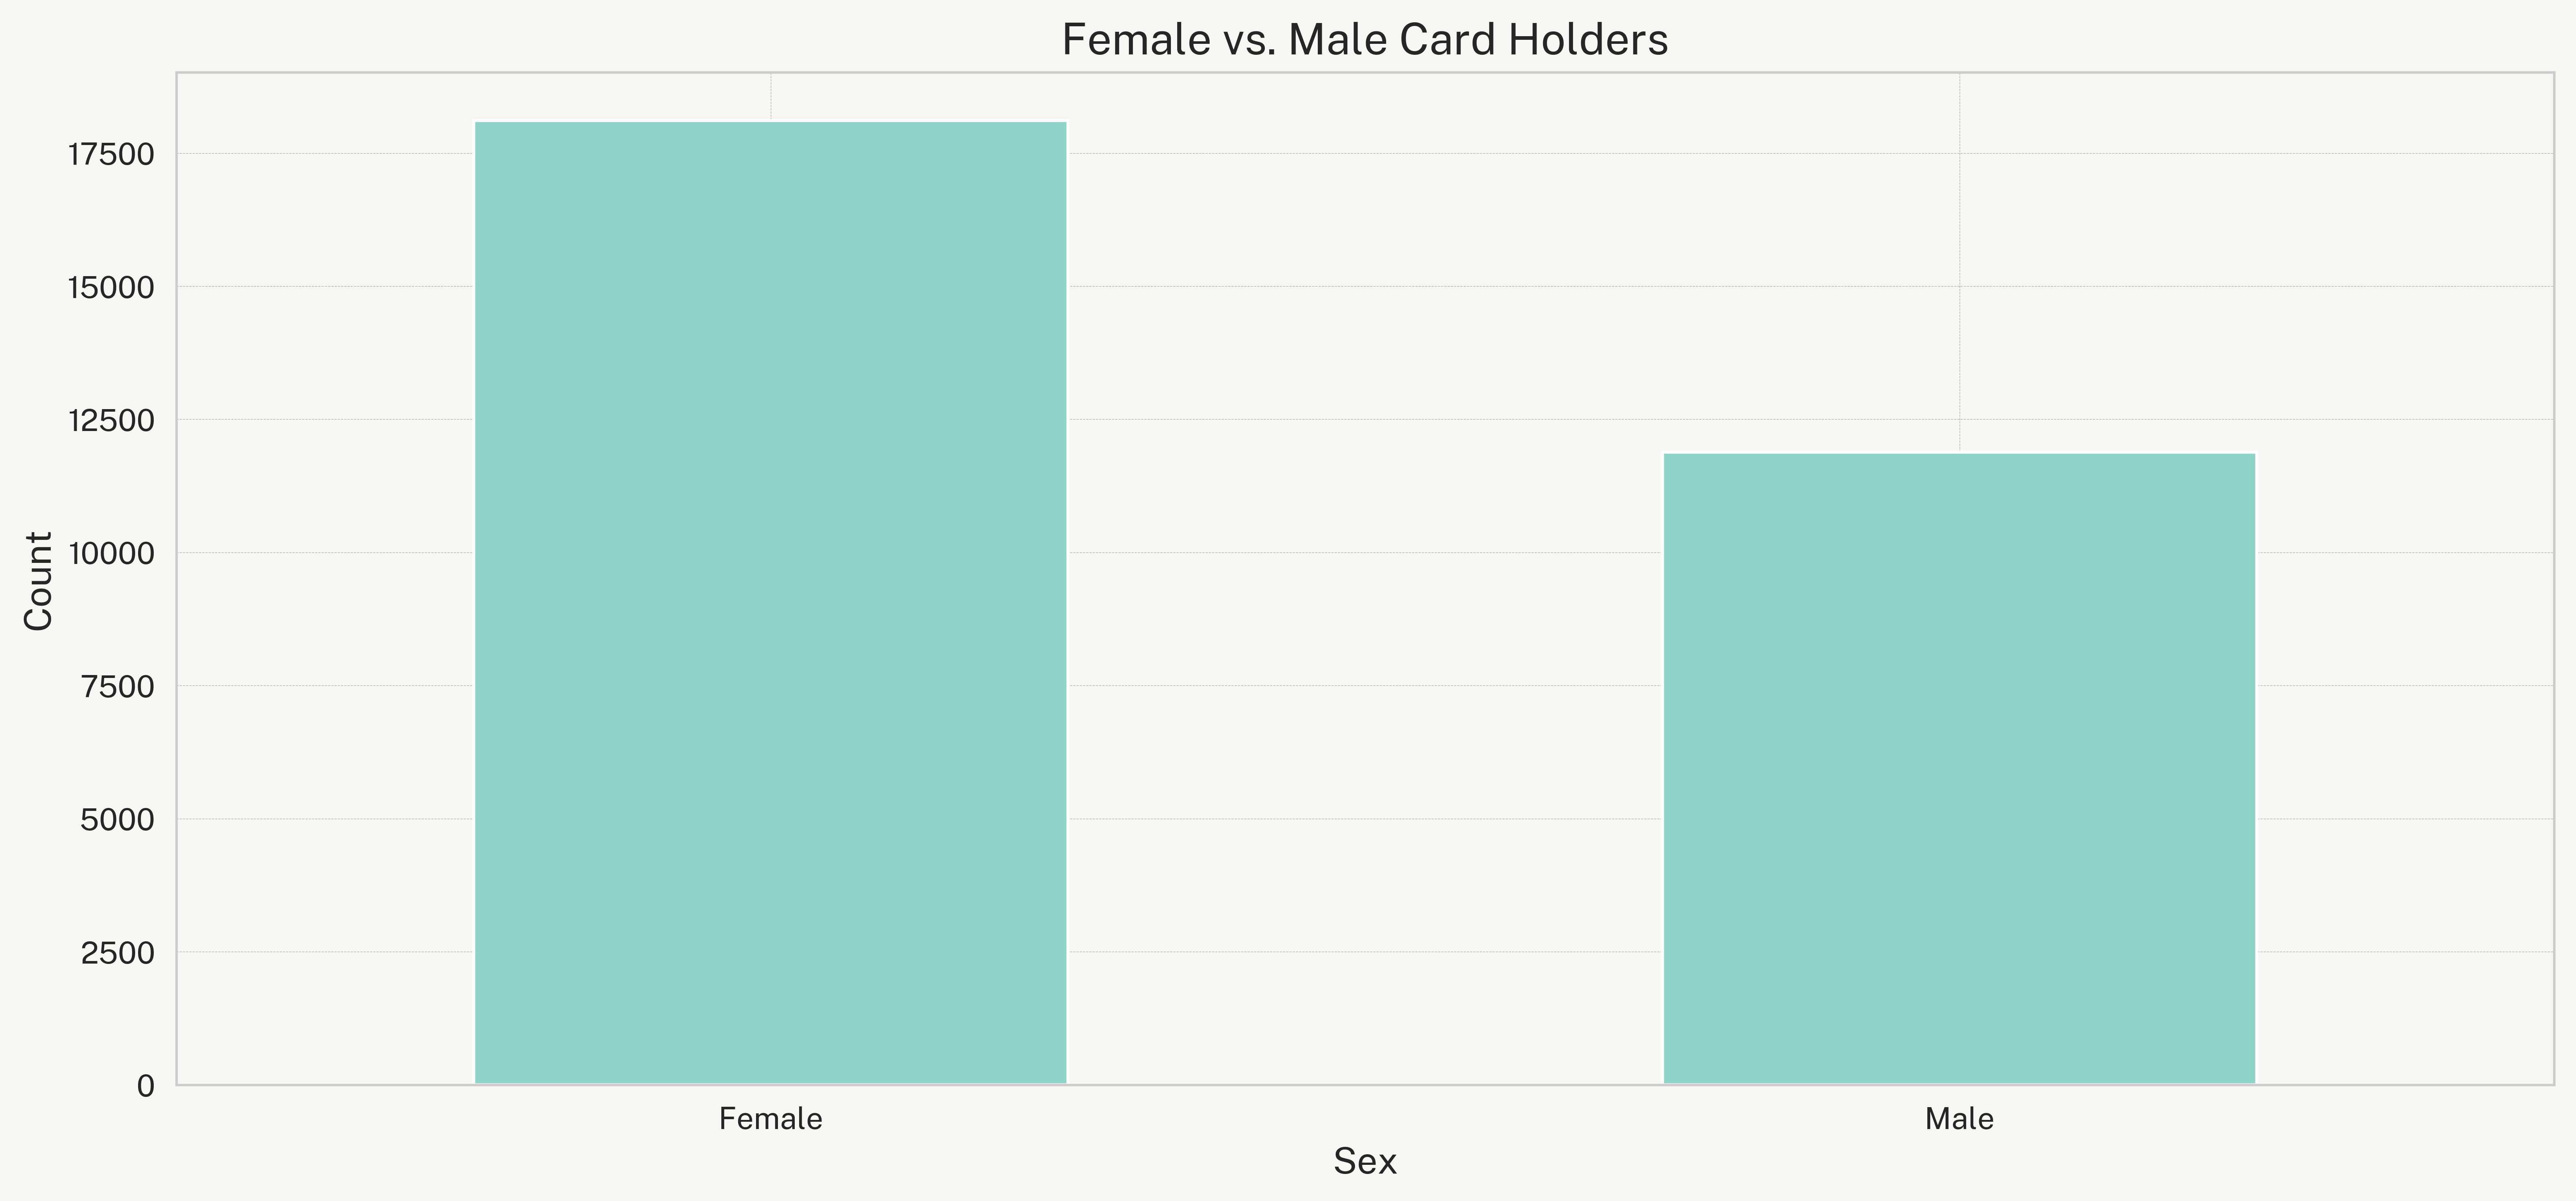

In [ ]:
# df['X2'].hist(bins=10)
# plt.xlabel('X2')
# plt.ylabel('Freq')
# plt.title('Sex histogram')
# plt.show()

ax = default_data['SEX'].value_counts().plot(kind='bar')
# Define a dictionary to map numerical labels to categorical labels
label_map = {'1': 'Male', '2': 'Female'}

# Replace the x-axis labels
ax.set_xticklabels([label_map[x.get_text()] for x in ax.get_xticklabels()], rotation=0)
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Female vs. Male Card Holders")

plt.show()

In [48]:
default_data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [54]:
default_data['EDUCATION'] = default_data['EDUCATION'].where(default_data['EDUCATION'].isin([1, 2, 3, 4]), 4)

In [55]:
default_data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

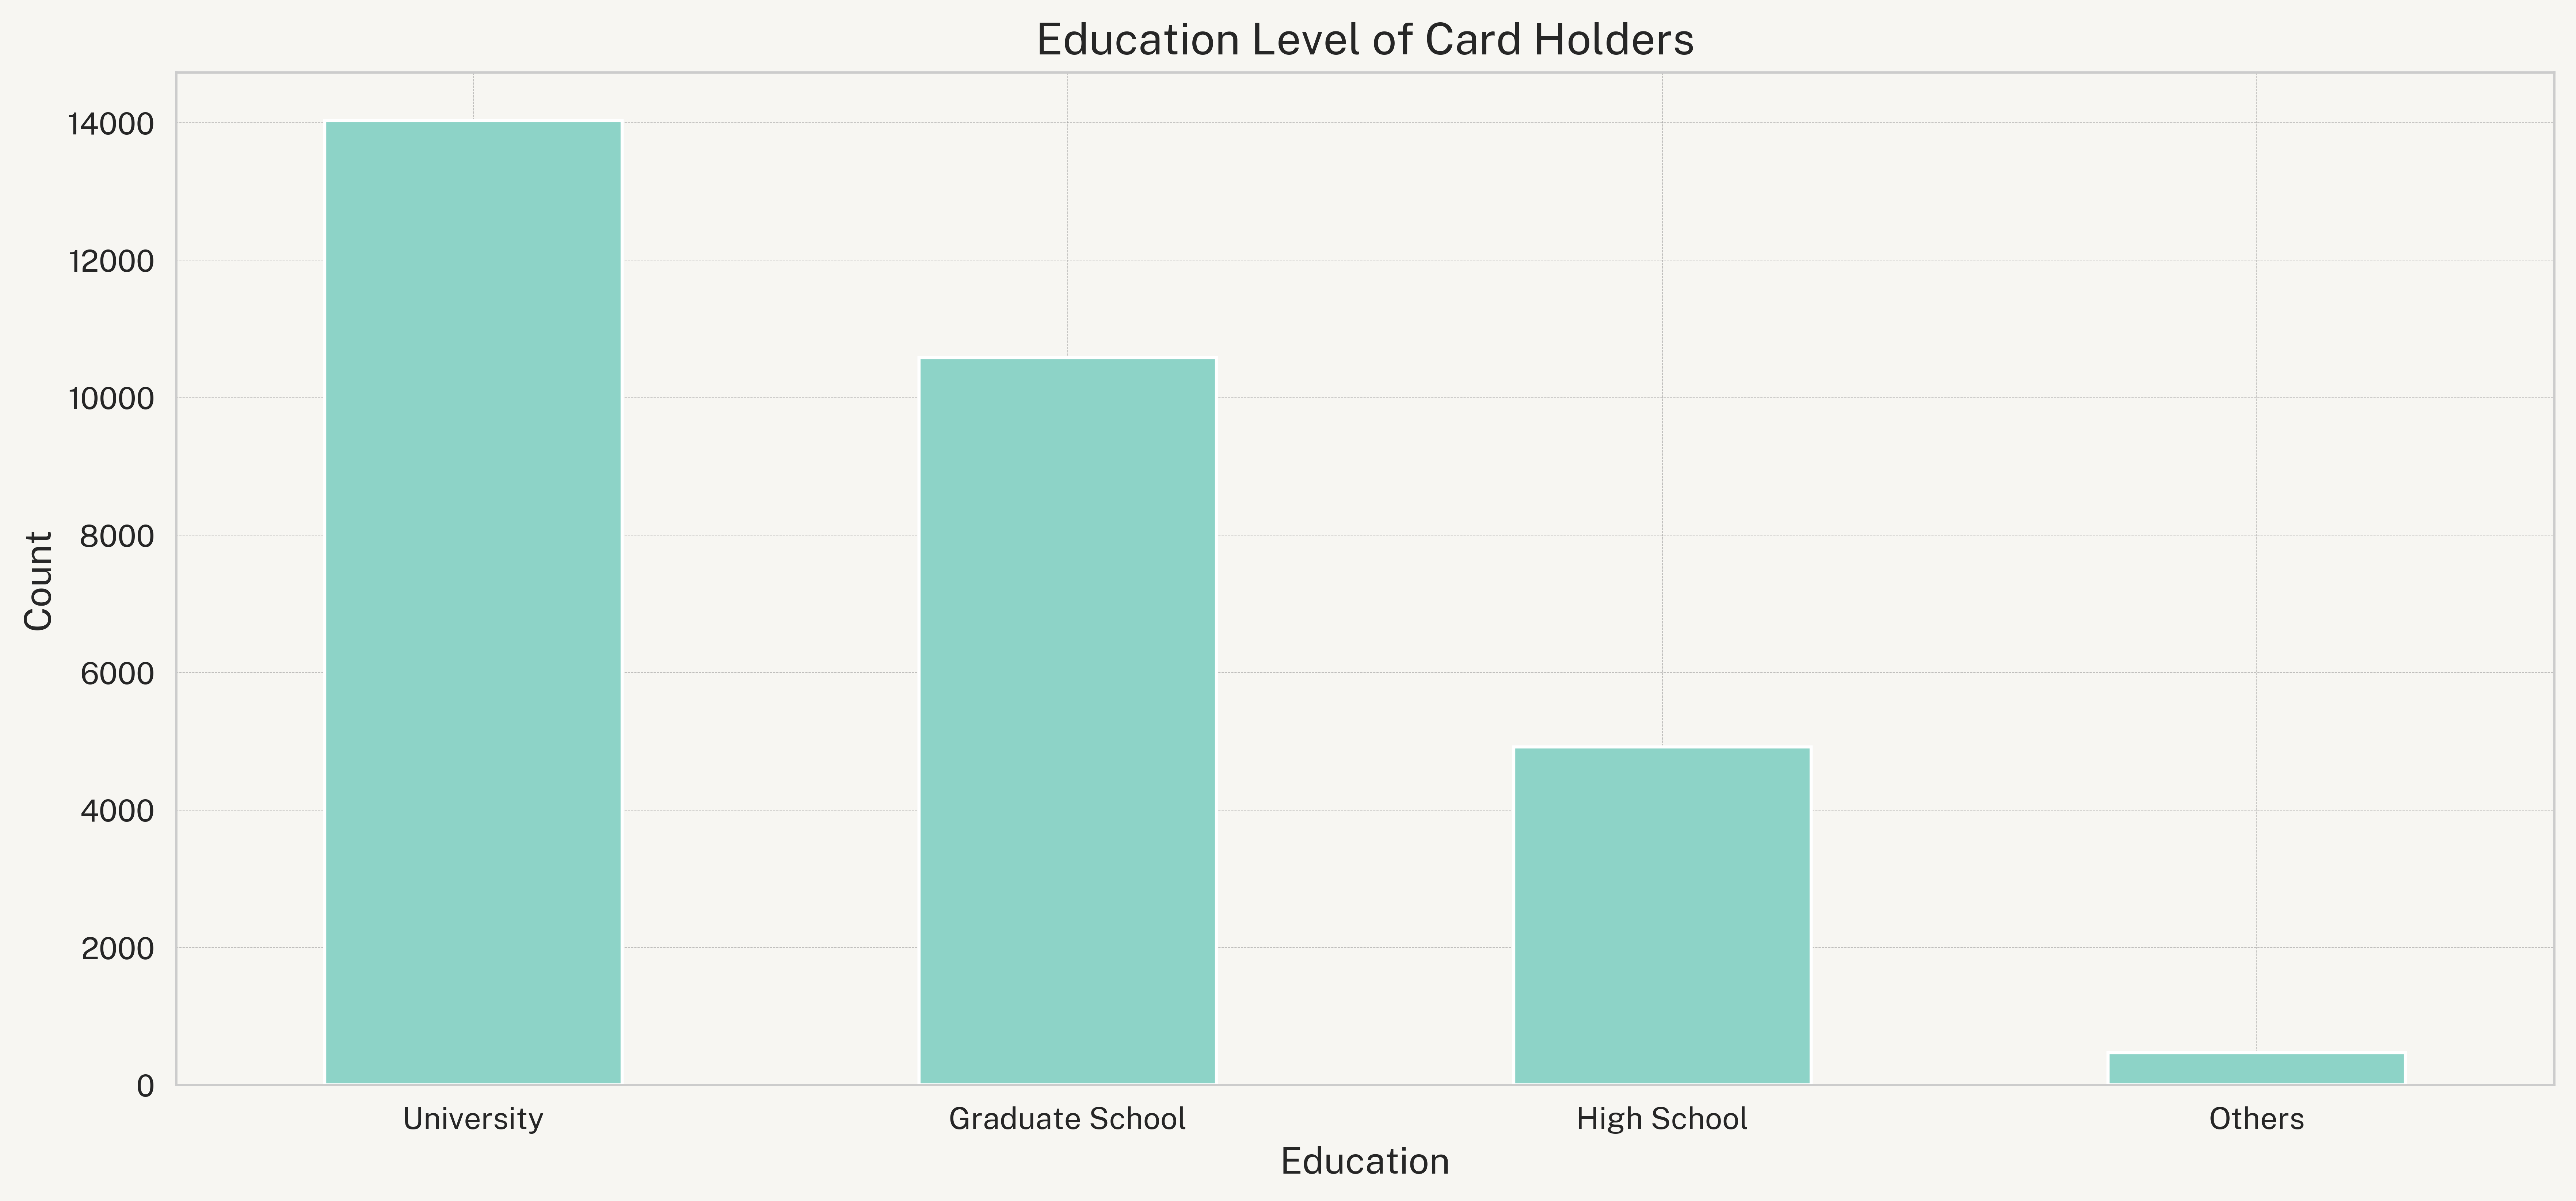

In [61]:
# df['X3'].hist(bins=10)
# plt.xlabel('X3')
# plt.ylabel('Freq')
# plt.title('Education histogram')
# plt.show()

ax = default_data['EDUCATION'].value_counts().plot(kind='bar')
# Define a dictionary to map numerical labels to categorical labels
label_map = {'1': 'Graduate School', '2': 'University', '3': 'High School', '4': 'Others'}

# Replace the x-axis labels
ax.set_xticklabels([label_map[x.get_text()] for x in ax.get_xticklabels()], rotation=0)
ax.set_xlabel("Education")
ax.set_ylabel("Count")
ax.set_title("Education Level of Card Holders")

plt.show()

In [64]:
default_data['MARRIAGE'].value_counts()


MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [65]:
default_data['MARRIAGE'] = default_data['MARRIAGE'].where(default_data['MARRIAGE'].isin([1, 2, 3]), 3)
default_data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

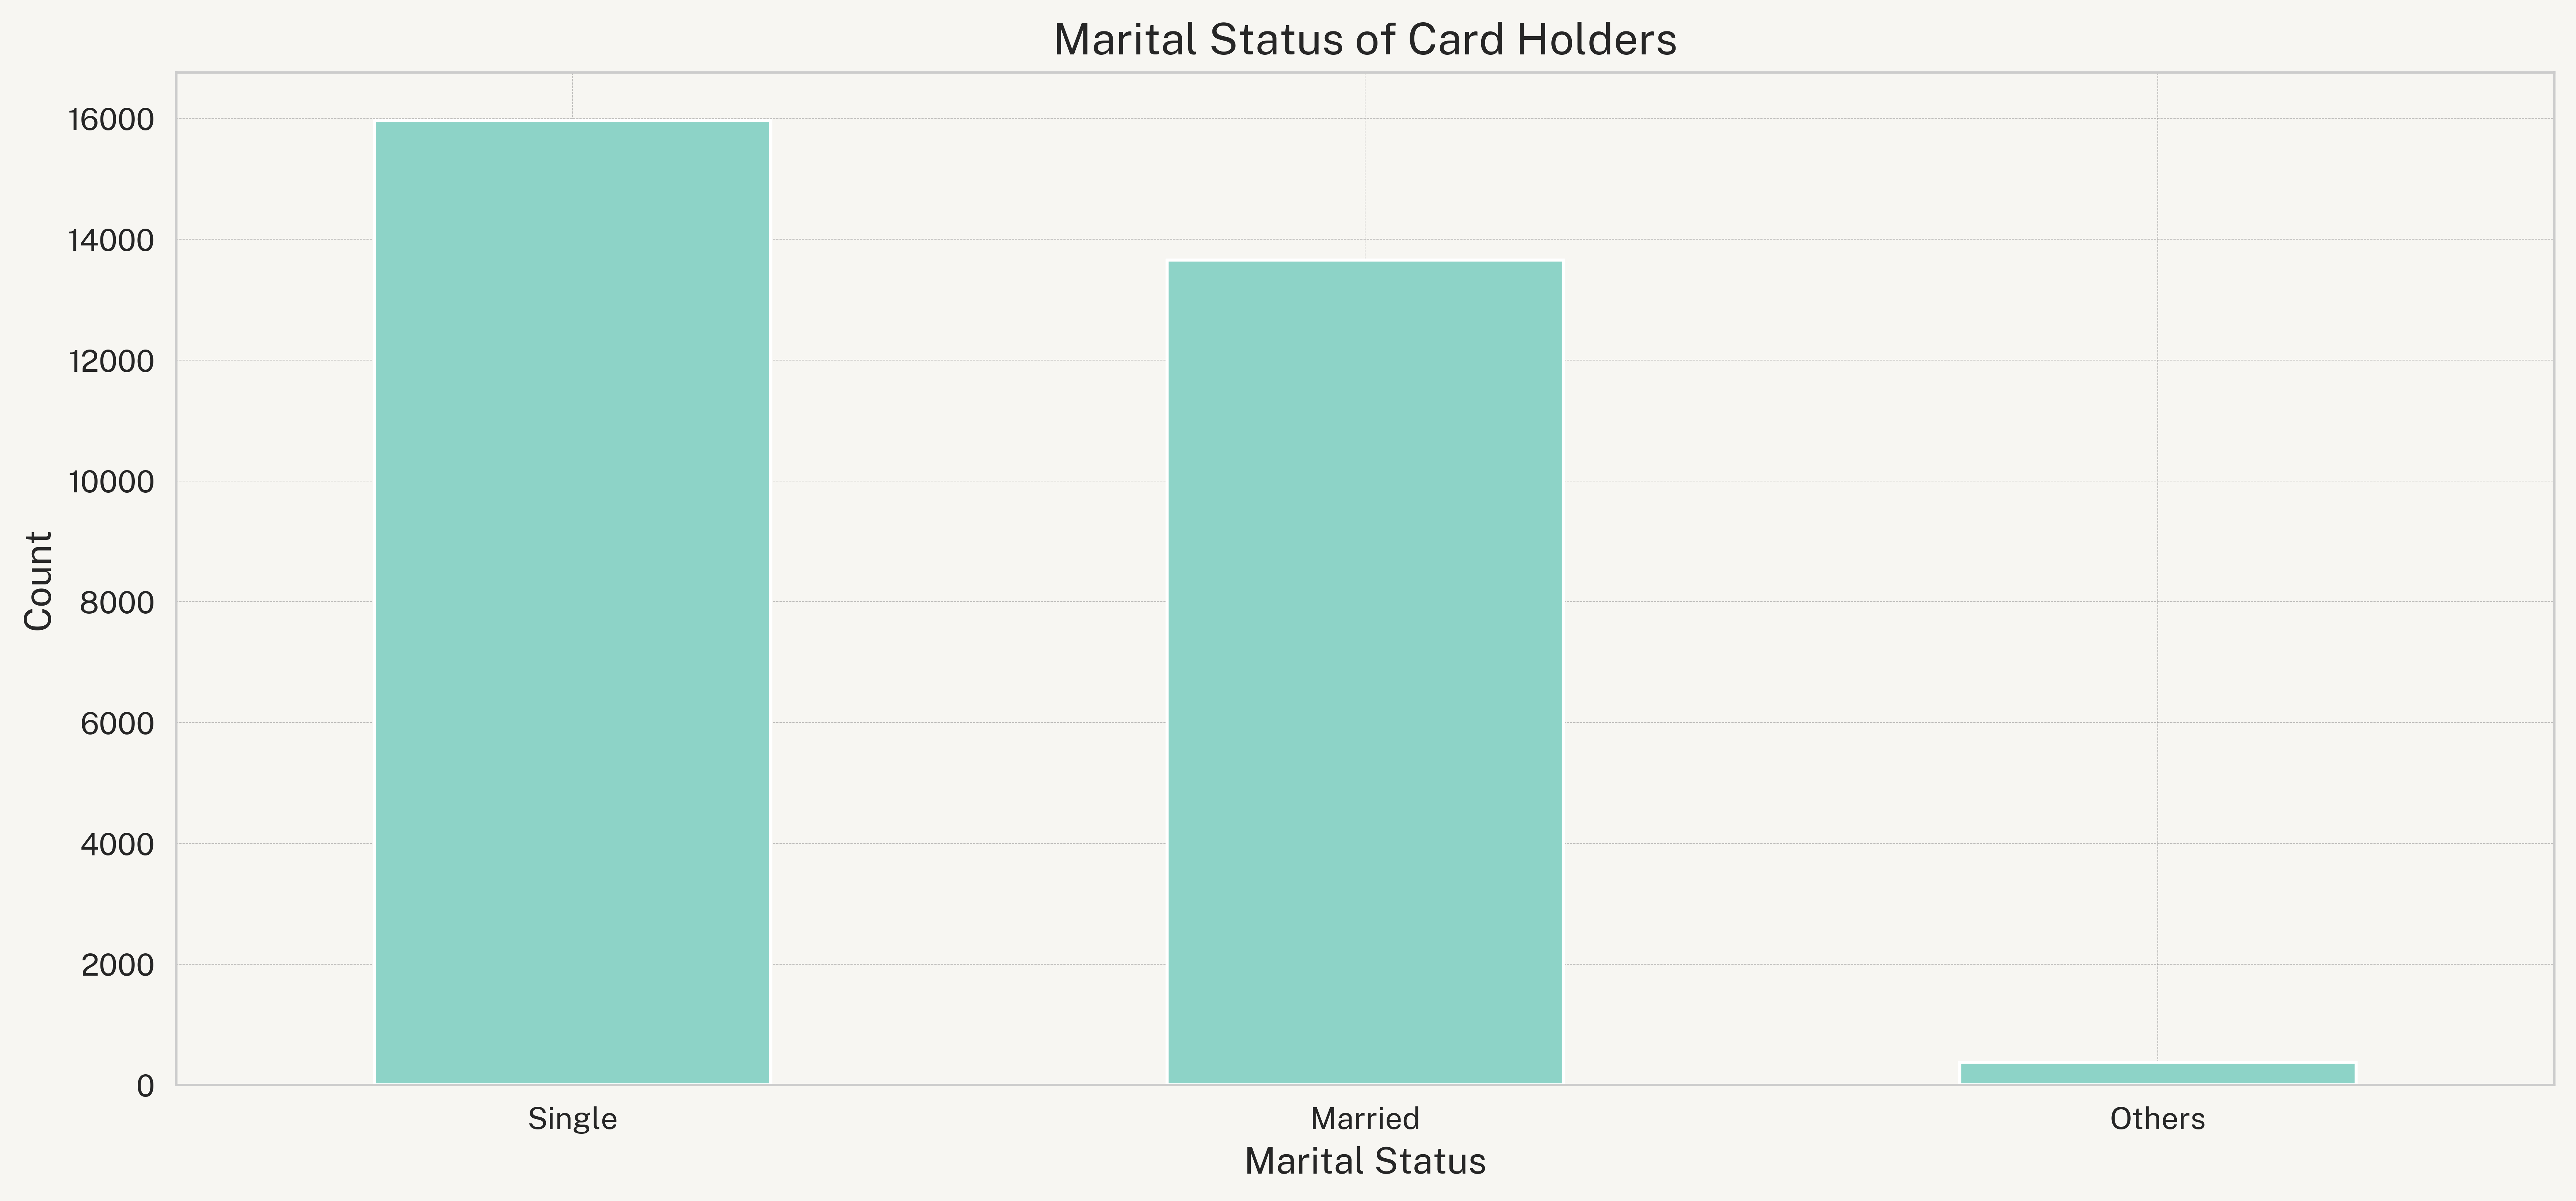

In [66]:
# df['X4'].hist(bins=10)
# plt.xlabel('X4')
# plt.ylabel('Freq')
# plt.title('Marriage histogram')
# plt.show()

ax = default_data['MARRIAGE'].value_counts().plot(kind='bar')
# Define a dictionary to map numerical labels to categorical labels
label_map = {'1': 'Married', '2': 'Single', '3': 'Others'}

# Replace the x-axis labels
ax.set_xticklabels([label_map[x.get_text()] for x in ax.get_xticklabels()], rotation=0)
ax.set_xlabel("Marital Status")
ax.set_ylabel("Count")
ax.set_title("Marital Status of Card Holders")

plt.show()

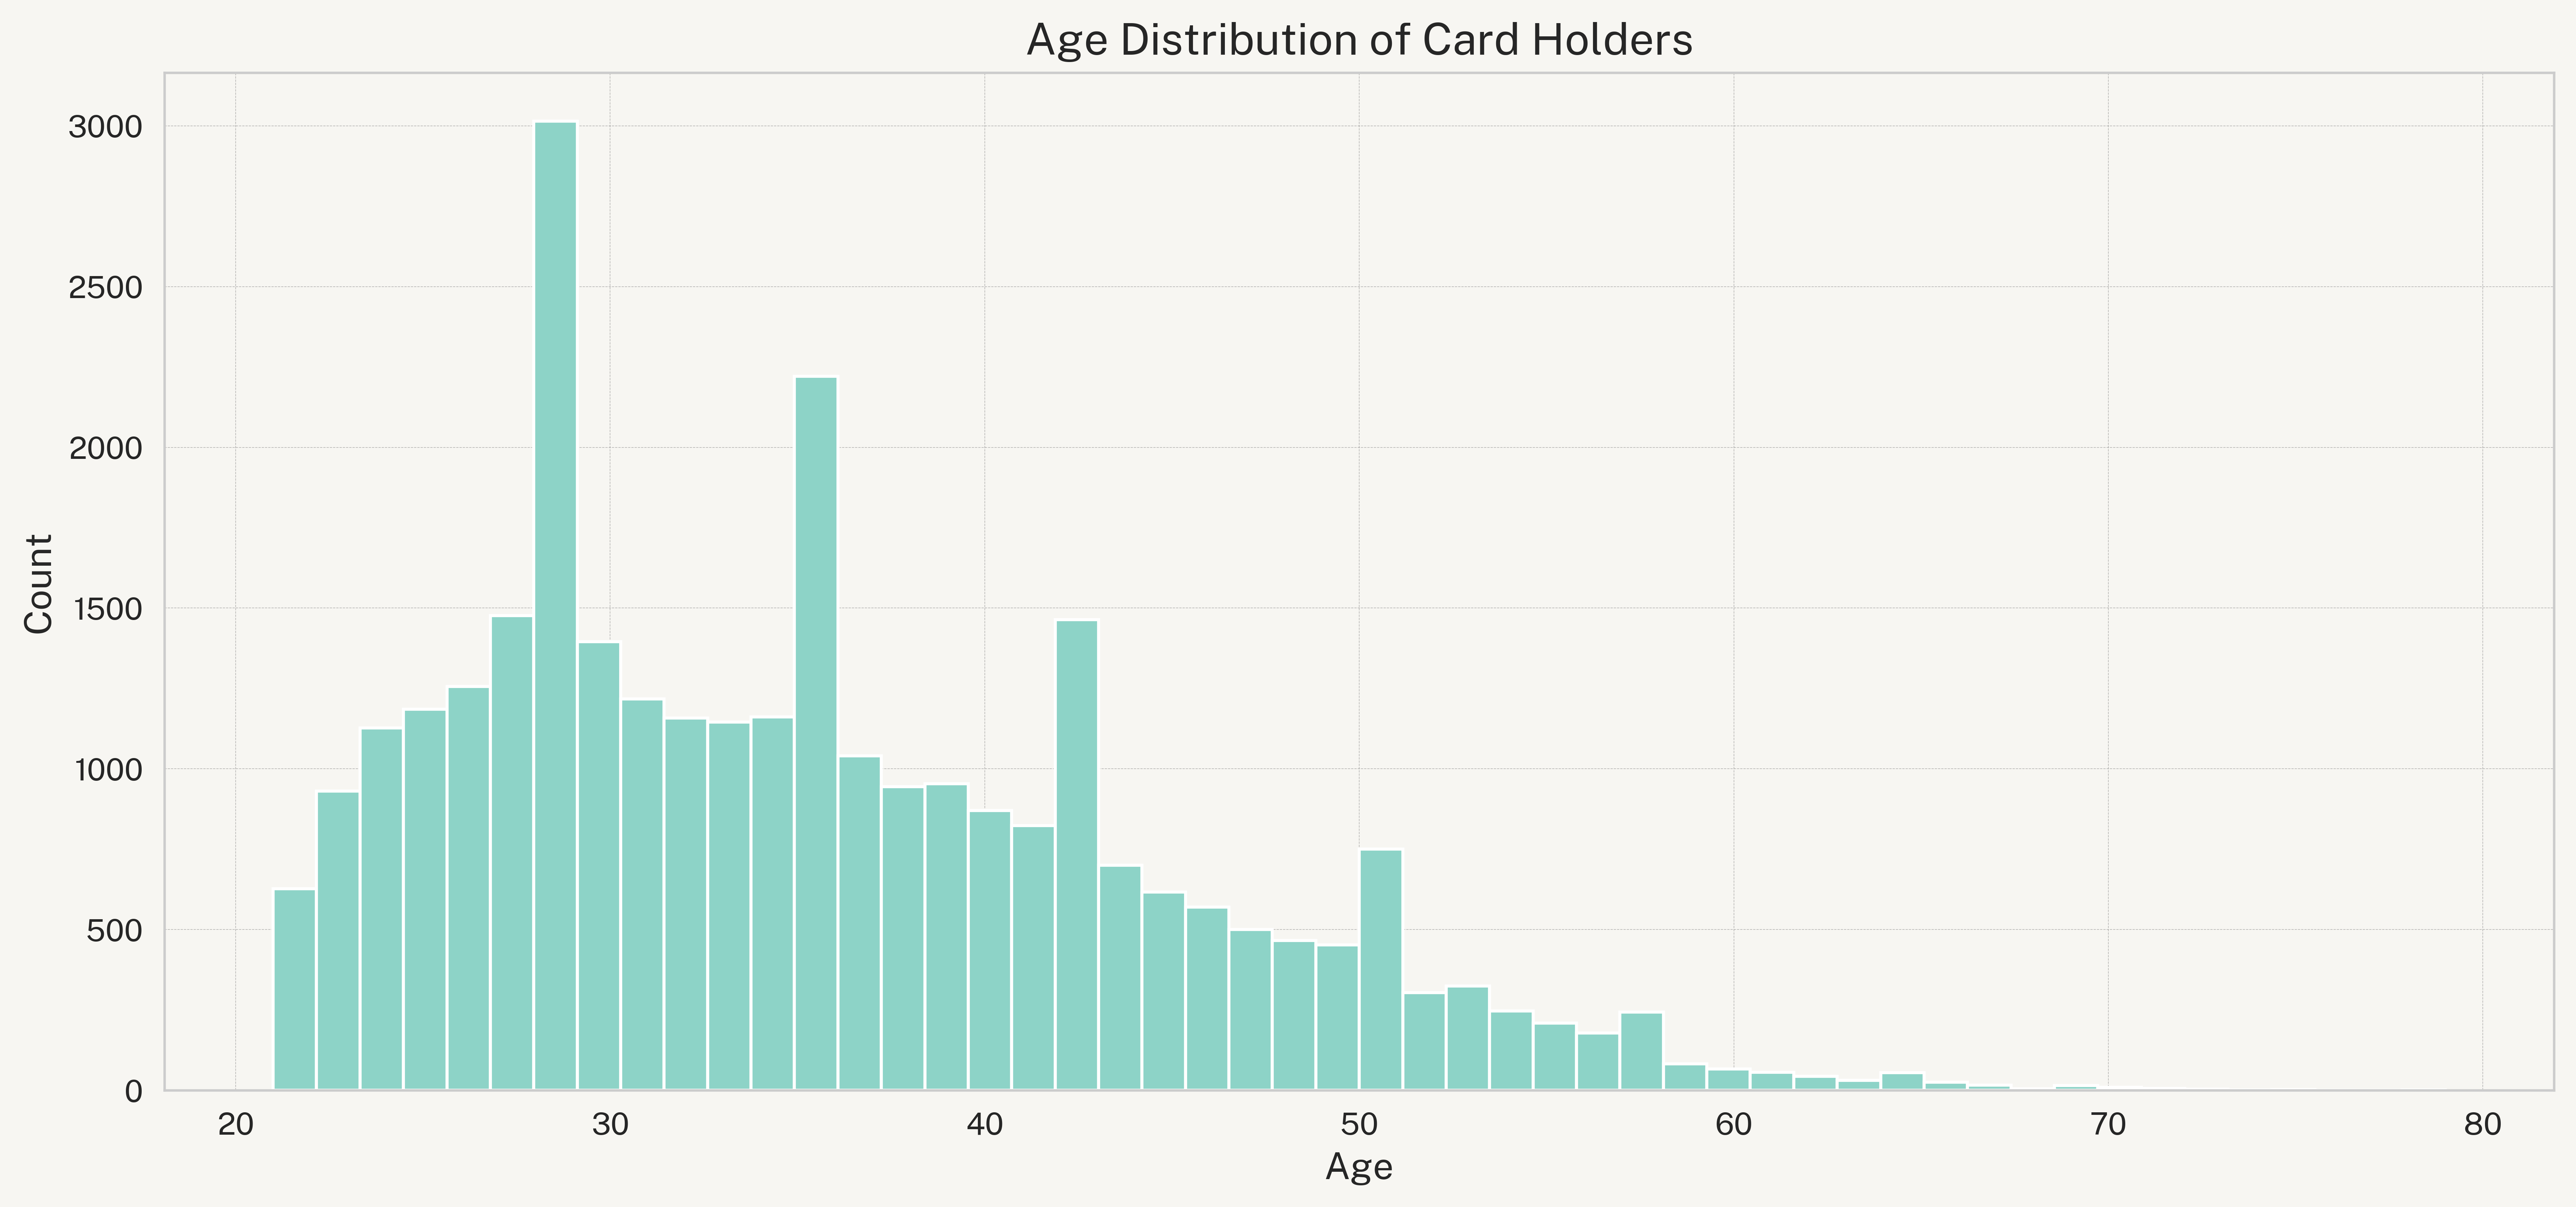

In [74]:
# df['X5'].hist(bins=10)
# plt.xlabel('X5')
# plt.ylabel('Freq')
# plt.title('Age histogram')
# plt.show()

ax = default_data['AGE'].hist(bins=50)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Age Distribution of Card Holders")
plt.show()

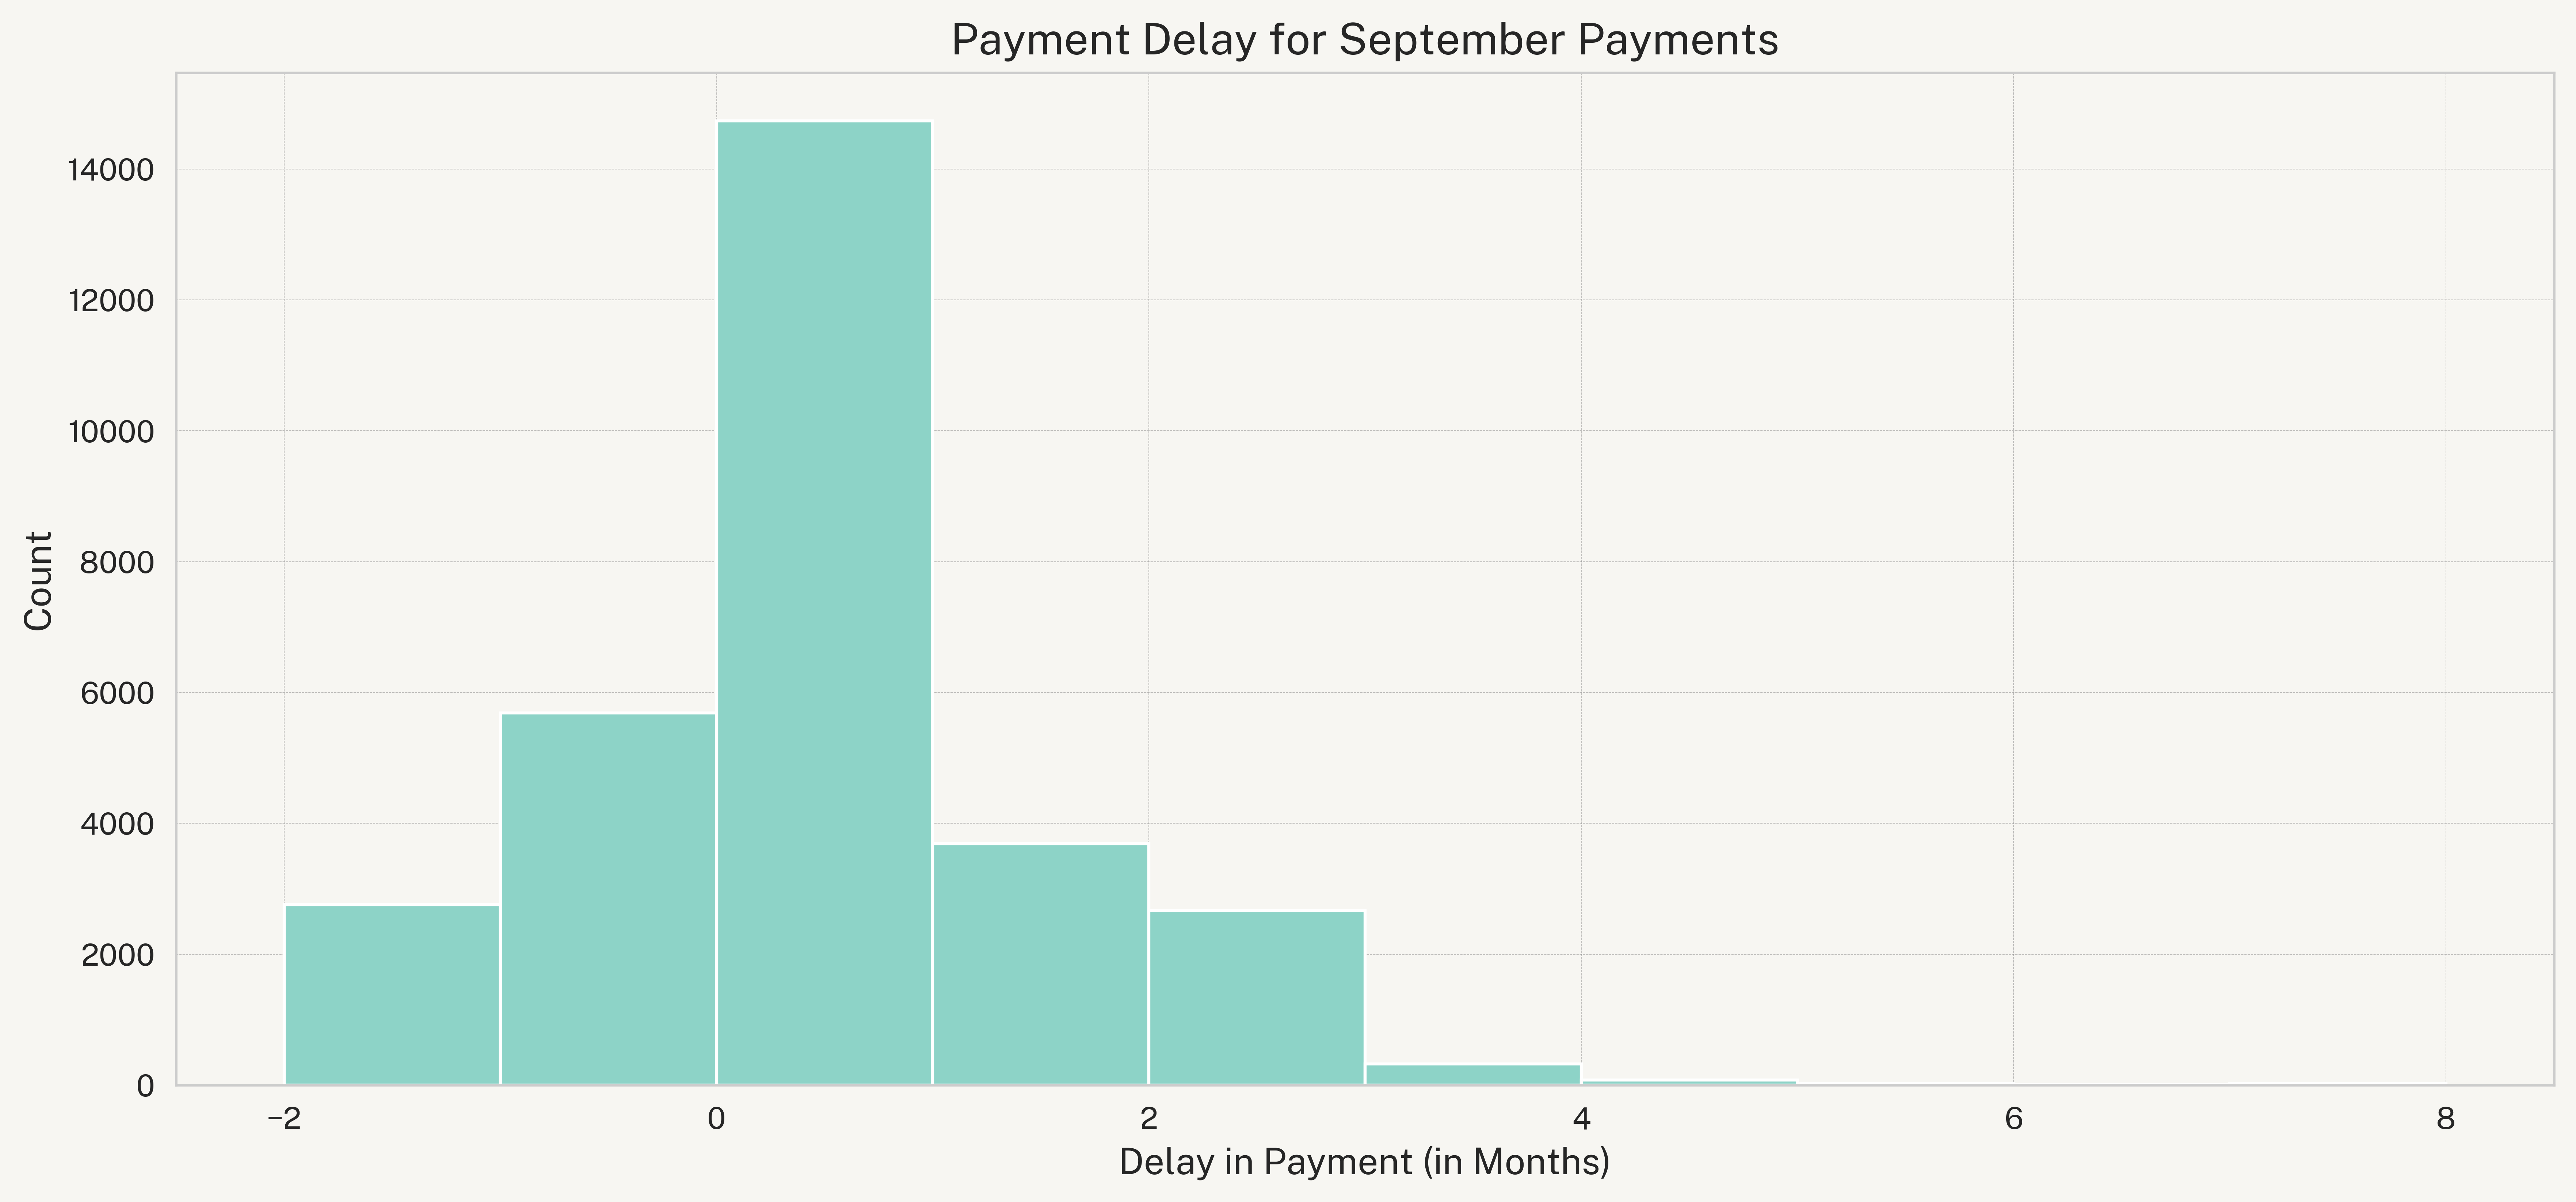

In [77]:
# df['X6'].hist(bins=10)
# plt.xlabel('X6')
# plt.ylabel('Freq')
# plt.title('Pay 0 histogram')
# plt.show()

ax = default_data['PAY_0'].hist(bins=10)
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for September Payments")

plt.show()

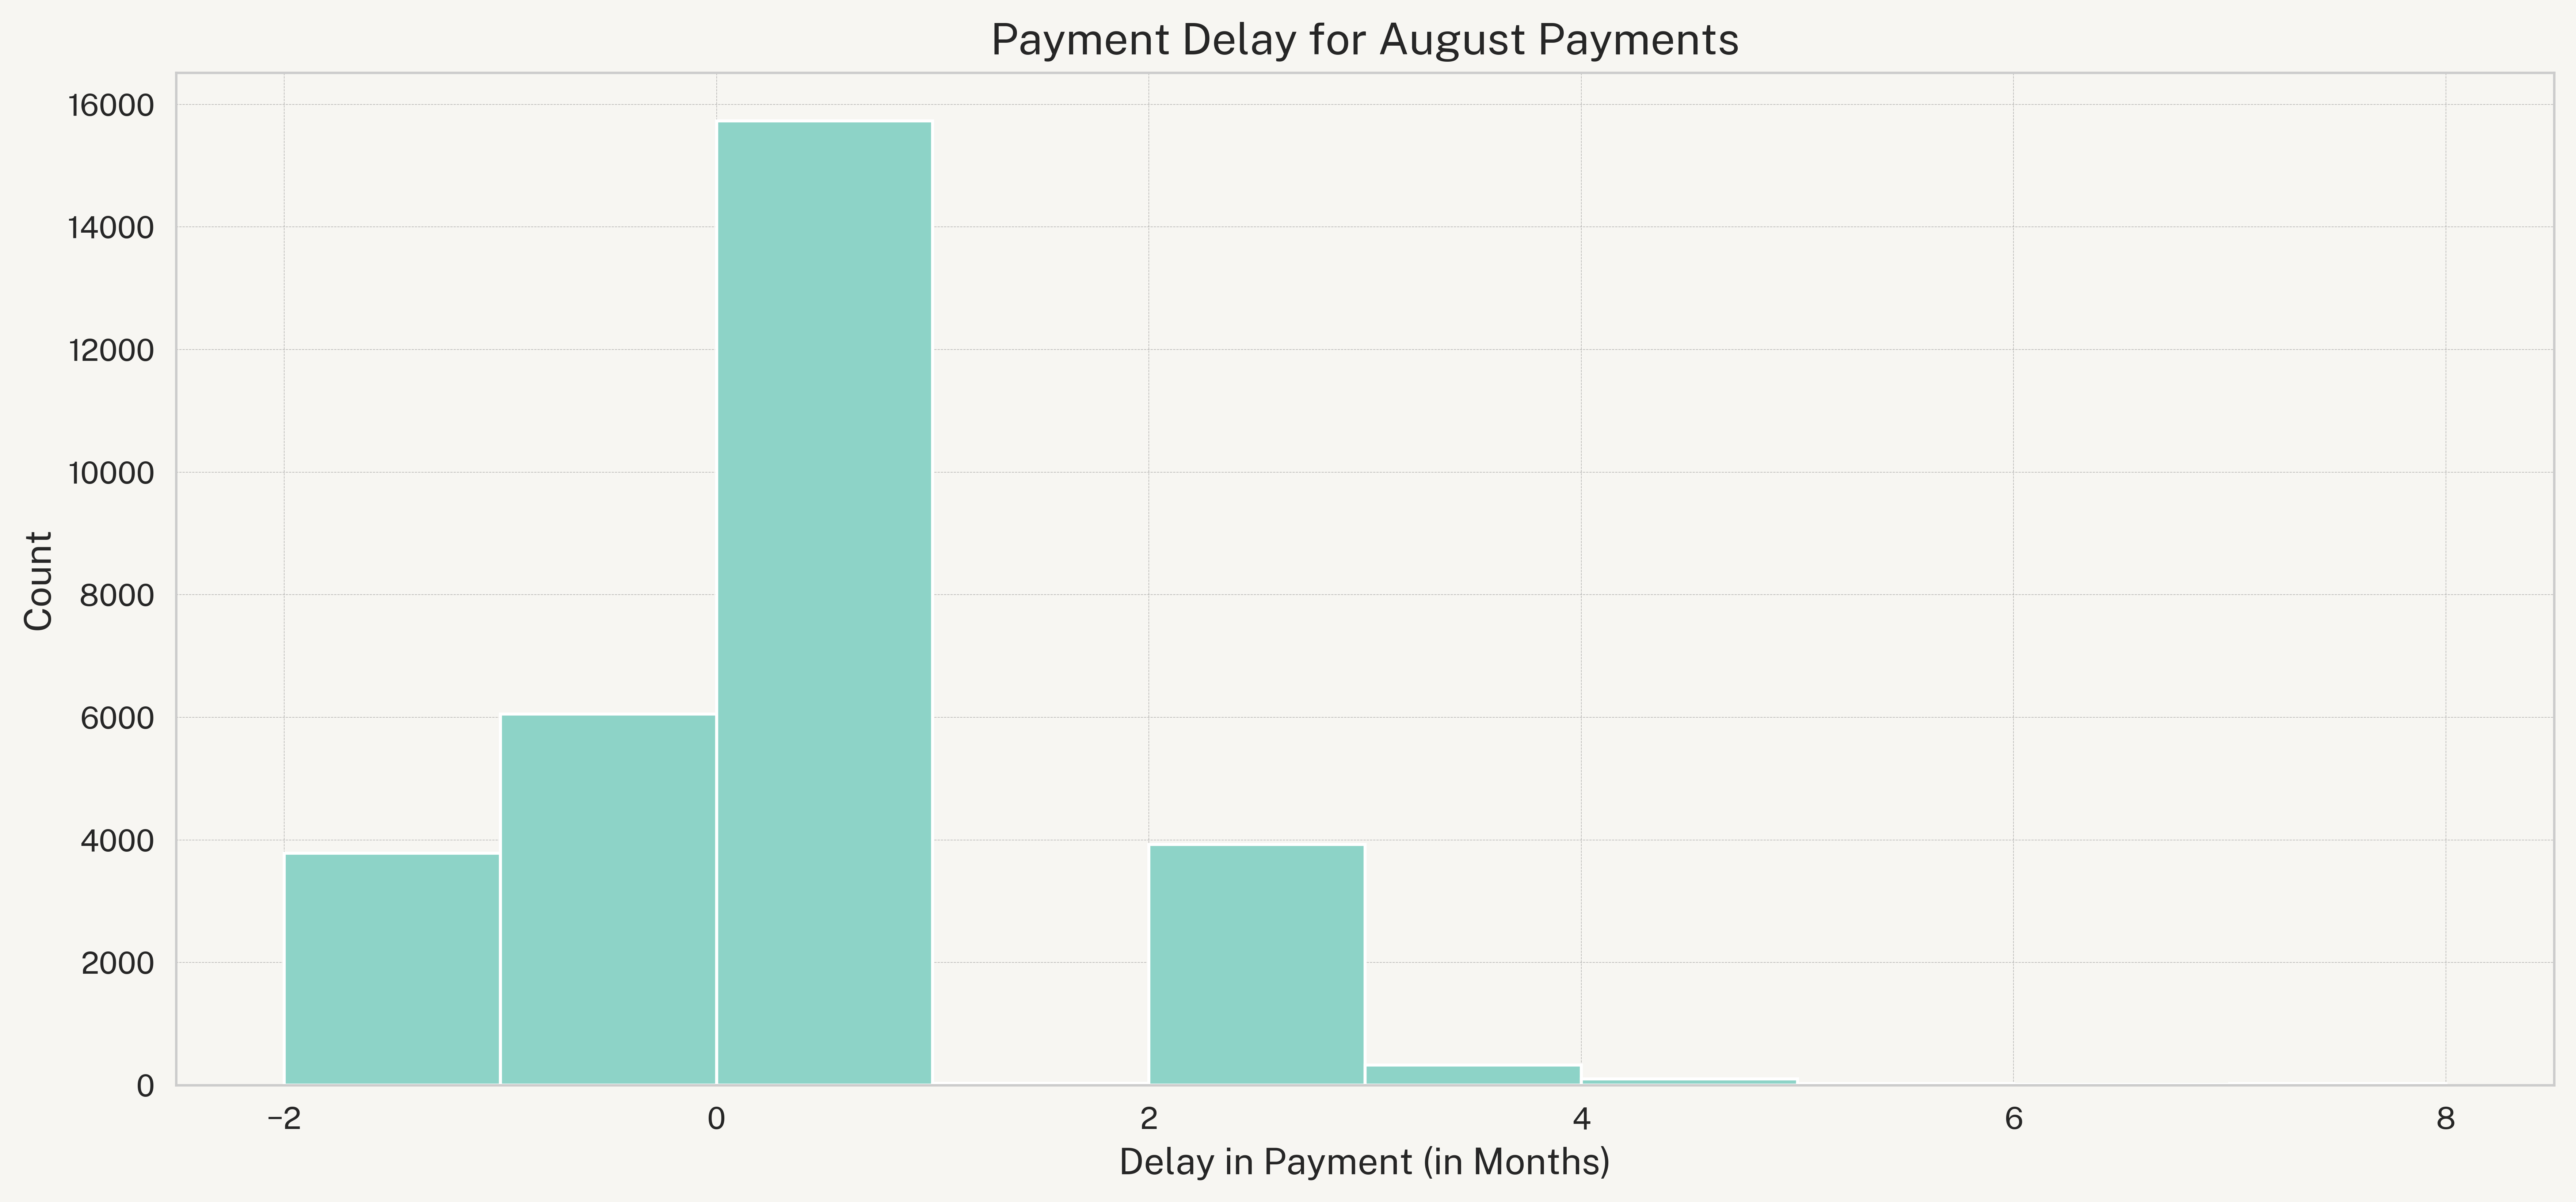

In [79]:
# df['X7'].hist(bins=10)
# plt.xlabel('X7')
# plt.ylabel('Freq')
# plt.title('Pay_1 histogram')
# plt.show()

ax = default_data['PAY_2'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for August Payments")

plt.show()

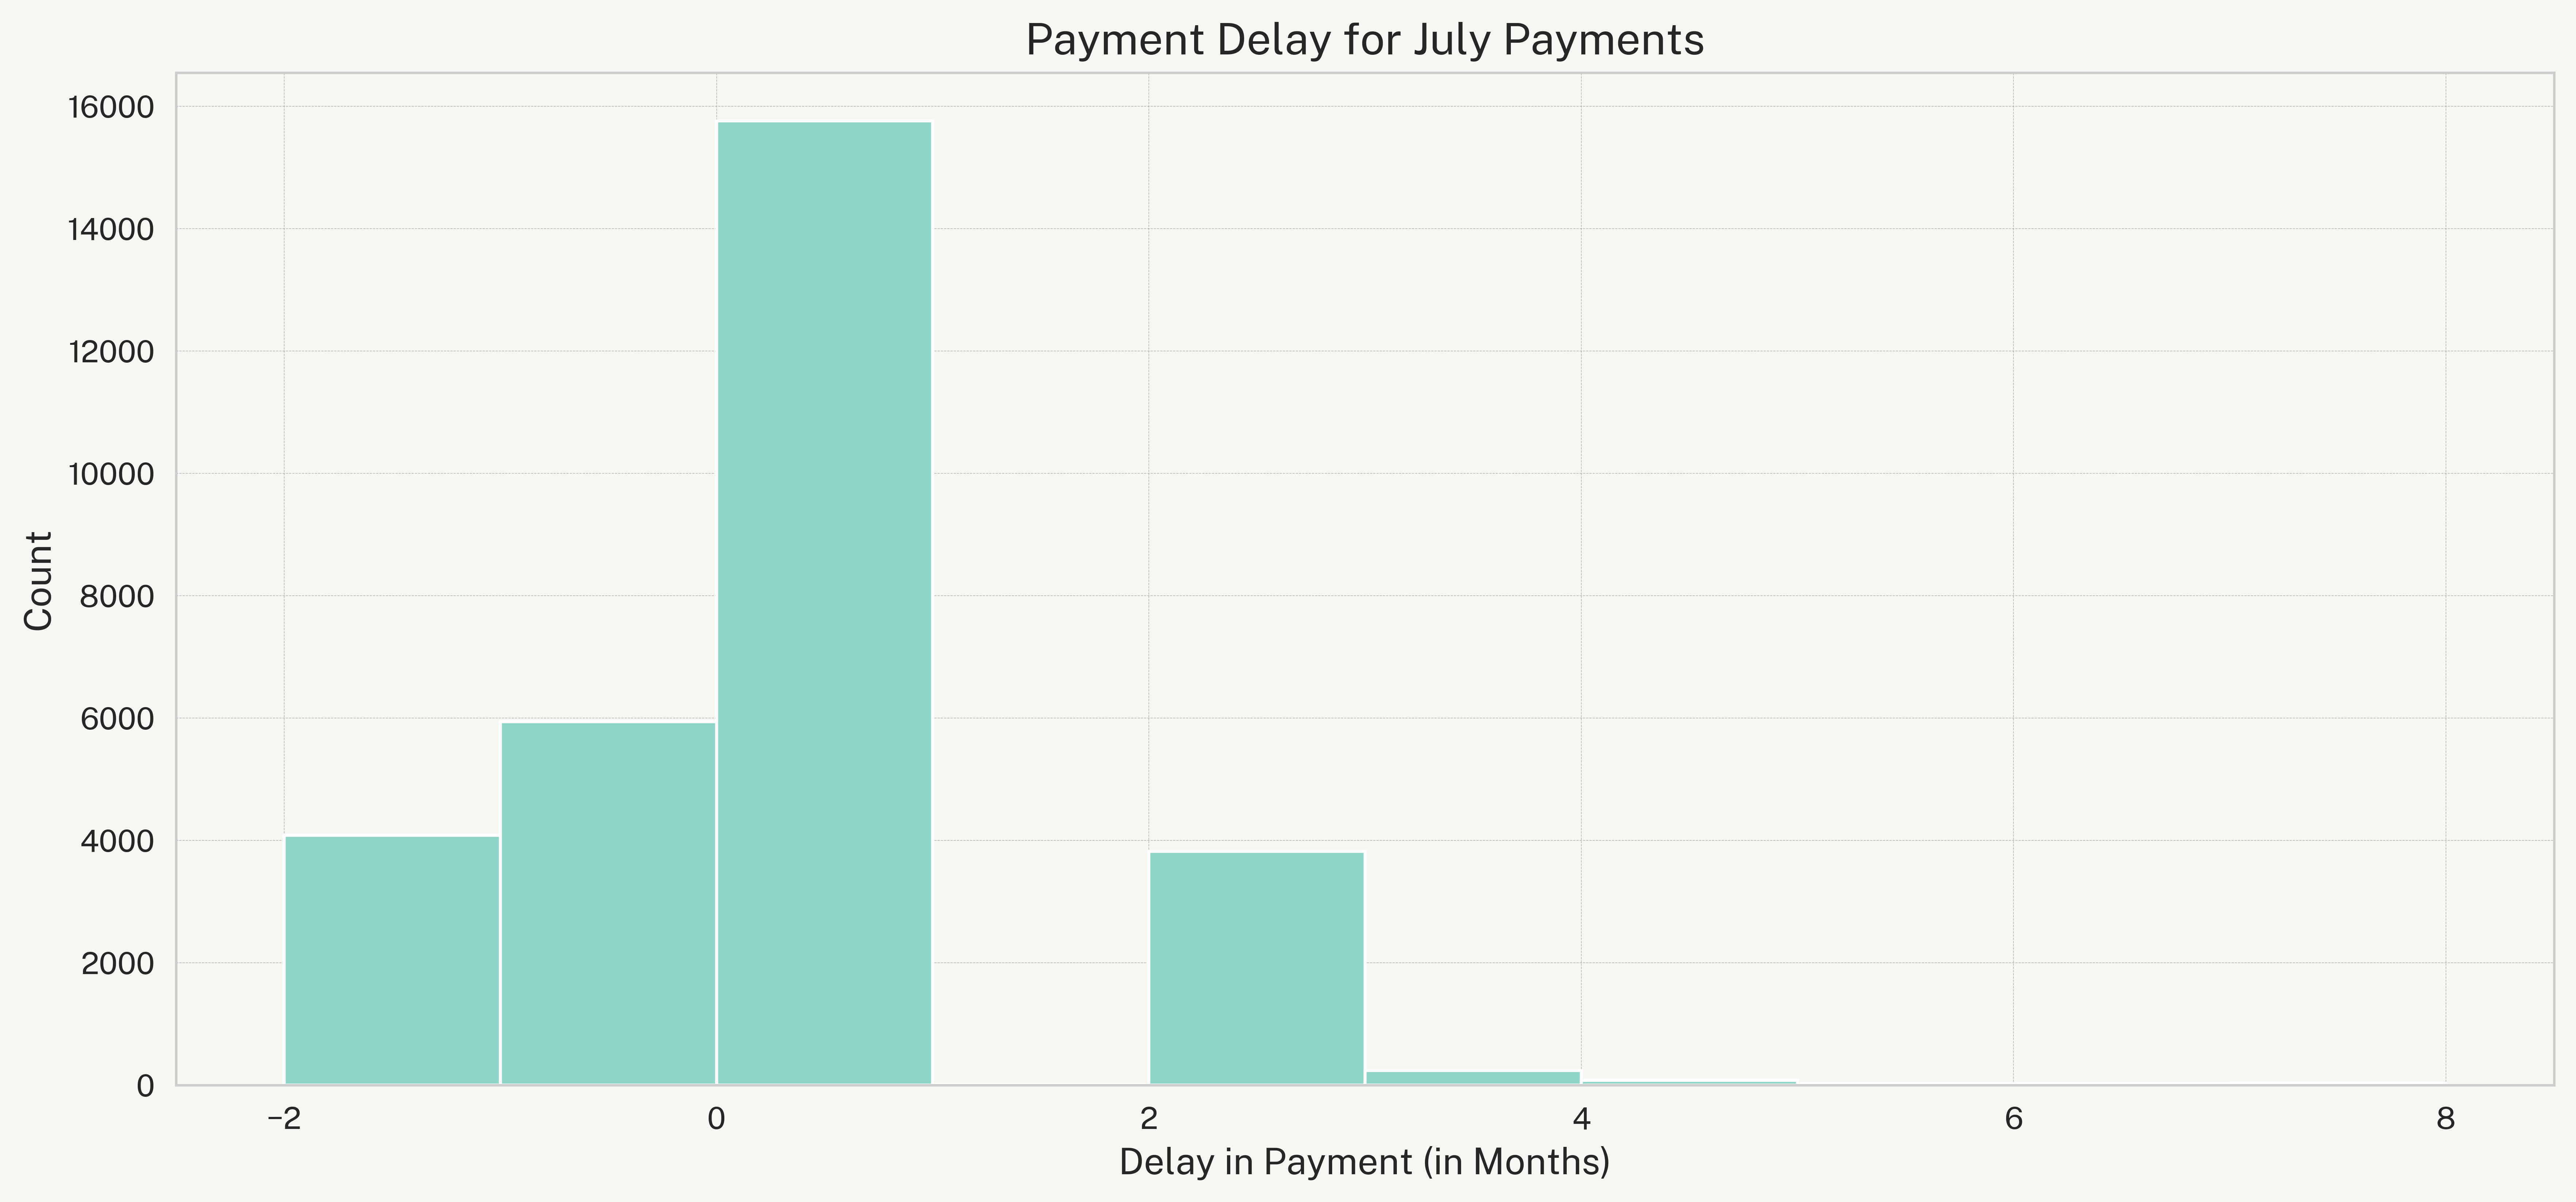

In [80]:
# df['X8'].hist(bins=10)
# plt.xlabel('X8')
# plt.ylabel('Freq')
# plt.title('Pay_ 2 histogram')
# plt.show()

ax = default_data['PAY_3'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for July Payments")

plt.show()

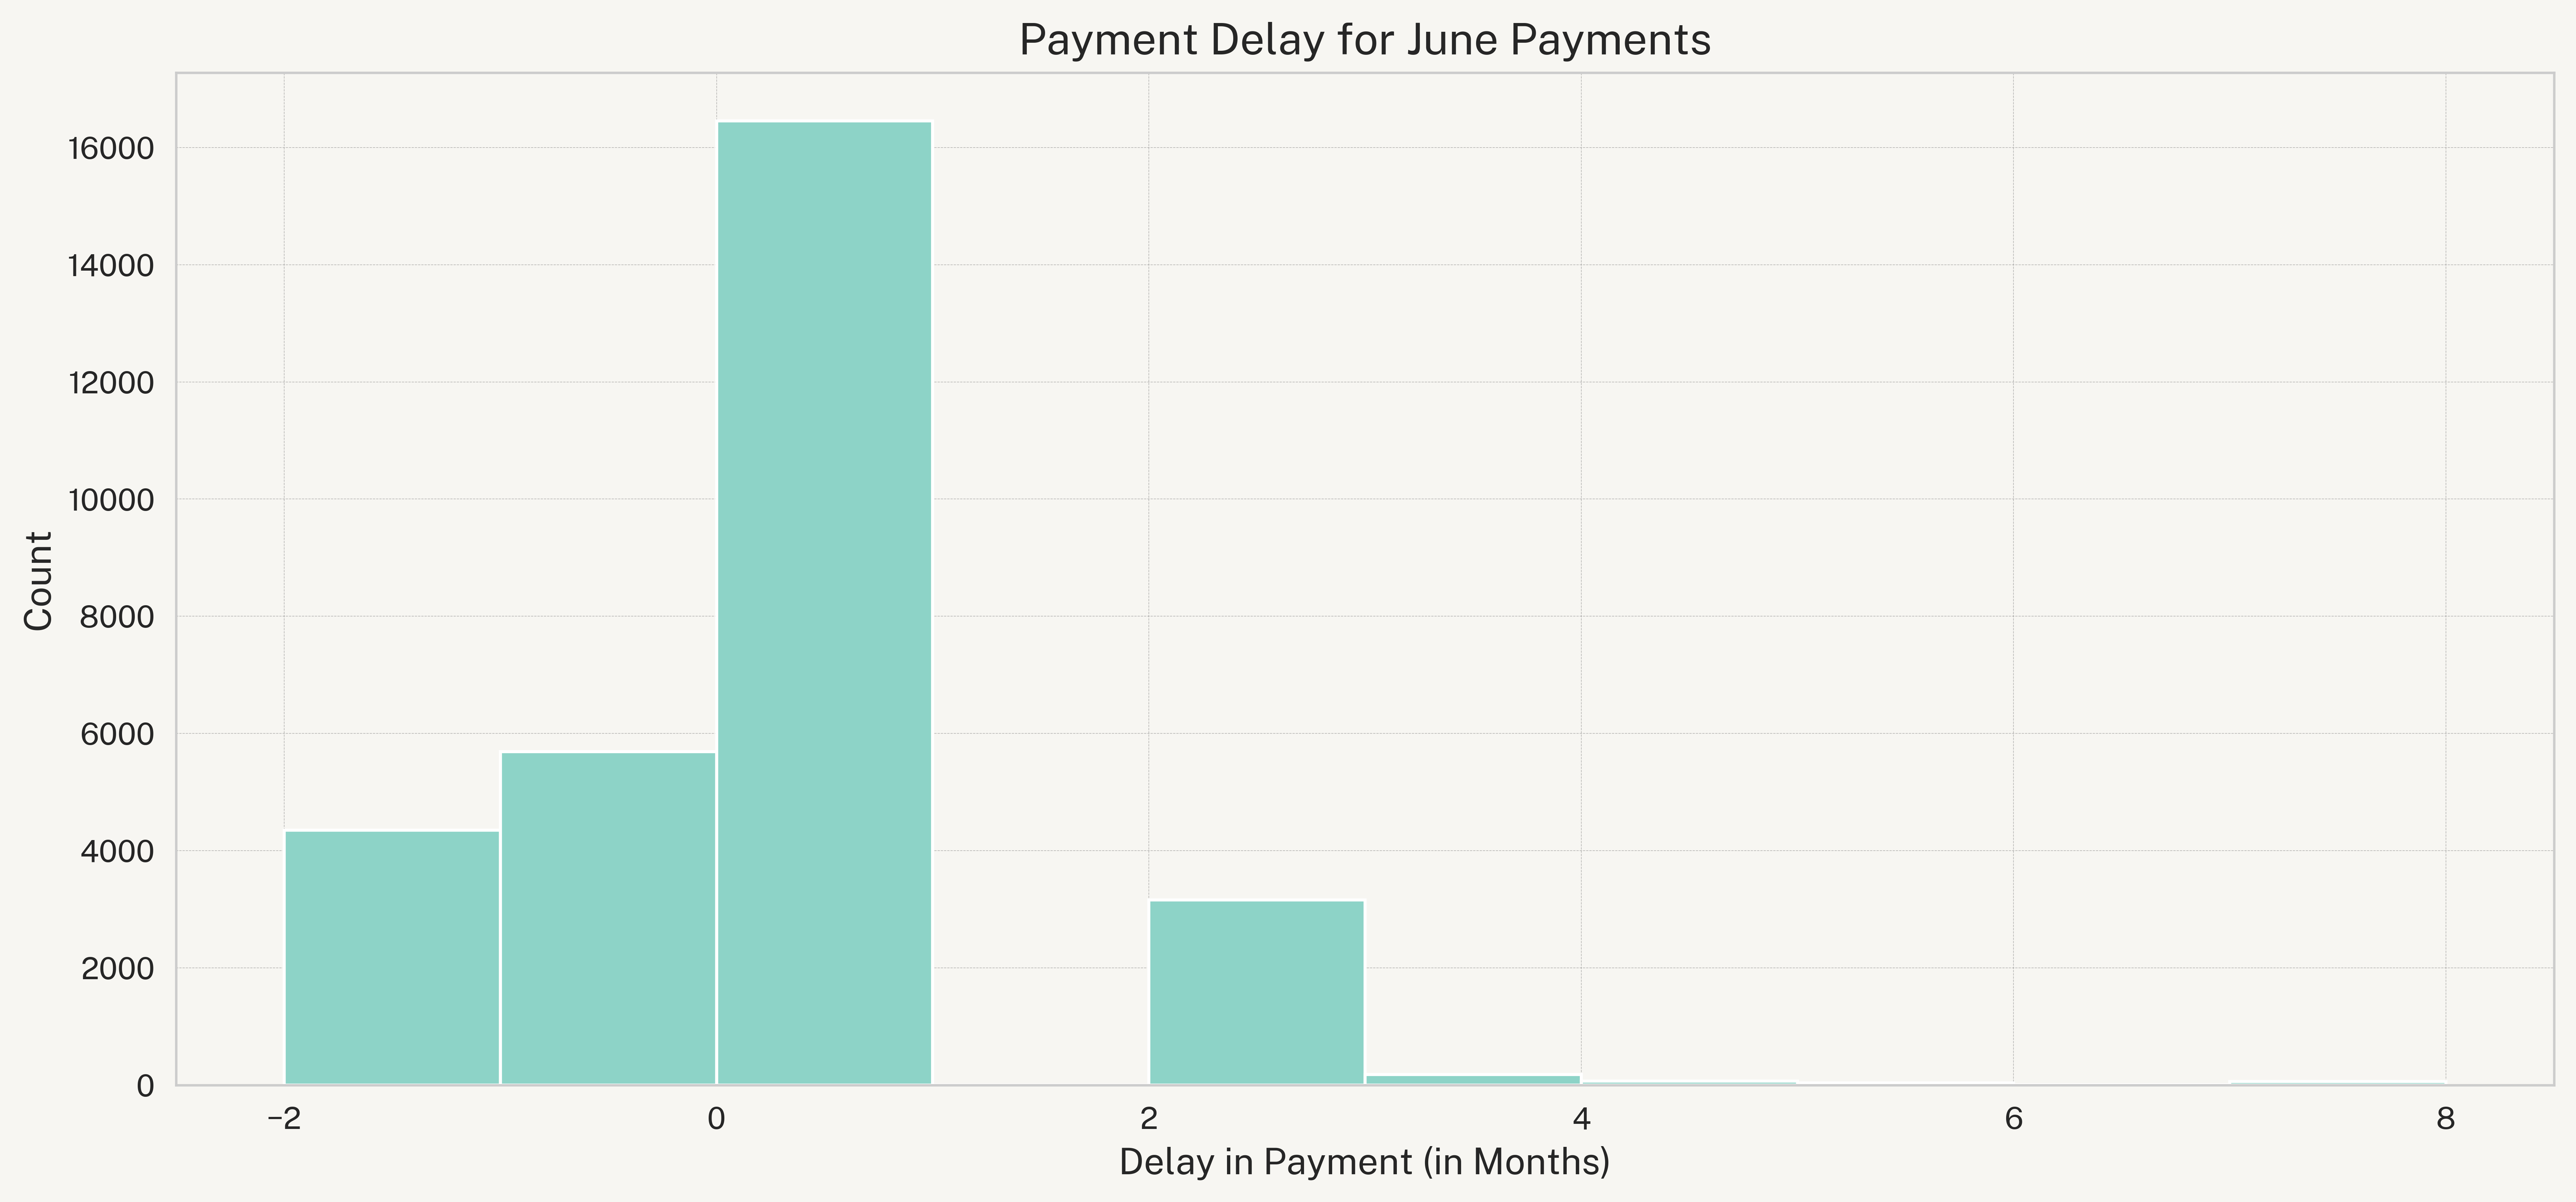

In [81]:
# df['X9'].hist(bins=10)
# plt.xlabel('X9')
# plt.ylabel('Freq')
# plt.title('Pay_3 histogram')
# plt.show()

ax = default_data['PAY_4'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for June Payments")

plt.show()

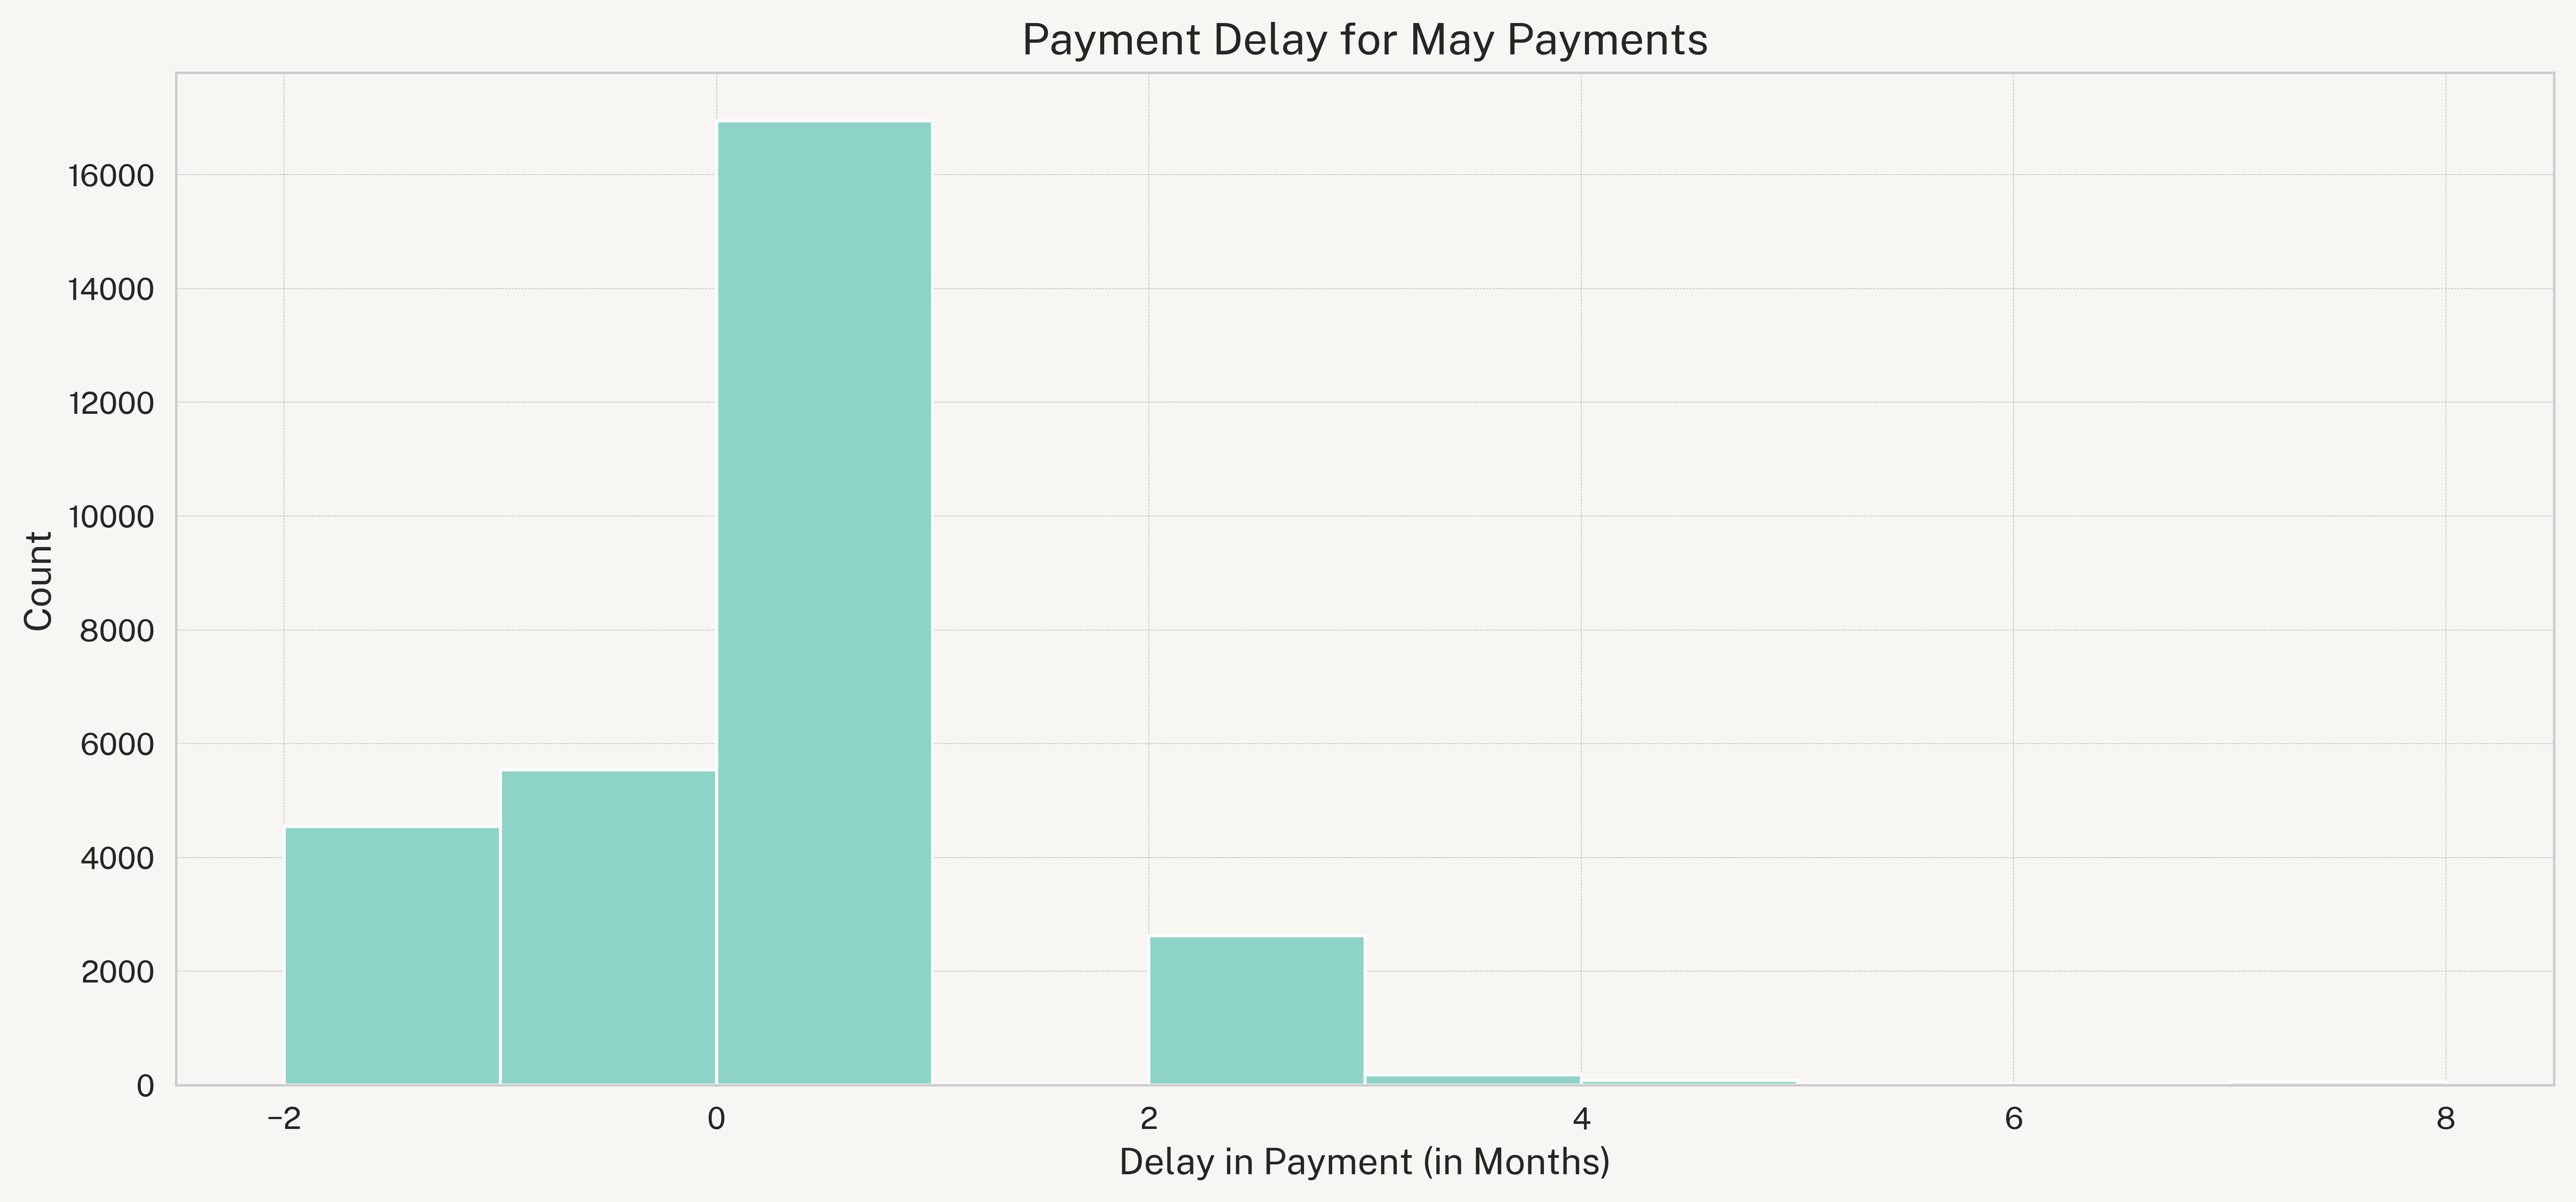

In [82]:
# df['X10'].hist(bins=10)
# plt.xlabel('X10')
# plt.ylabel('Freq')
# plt.title('Pay_4 histogram')
# plt.show()

ax = default_data['PAY_5'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for May Payments")

plt.show()

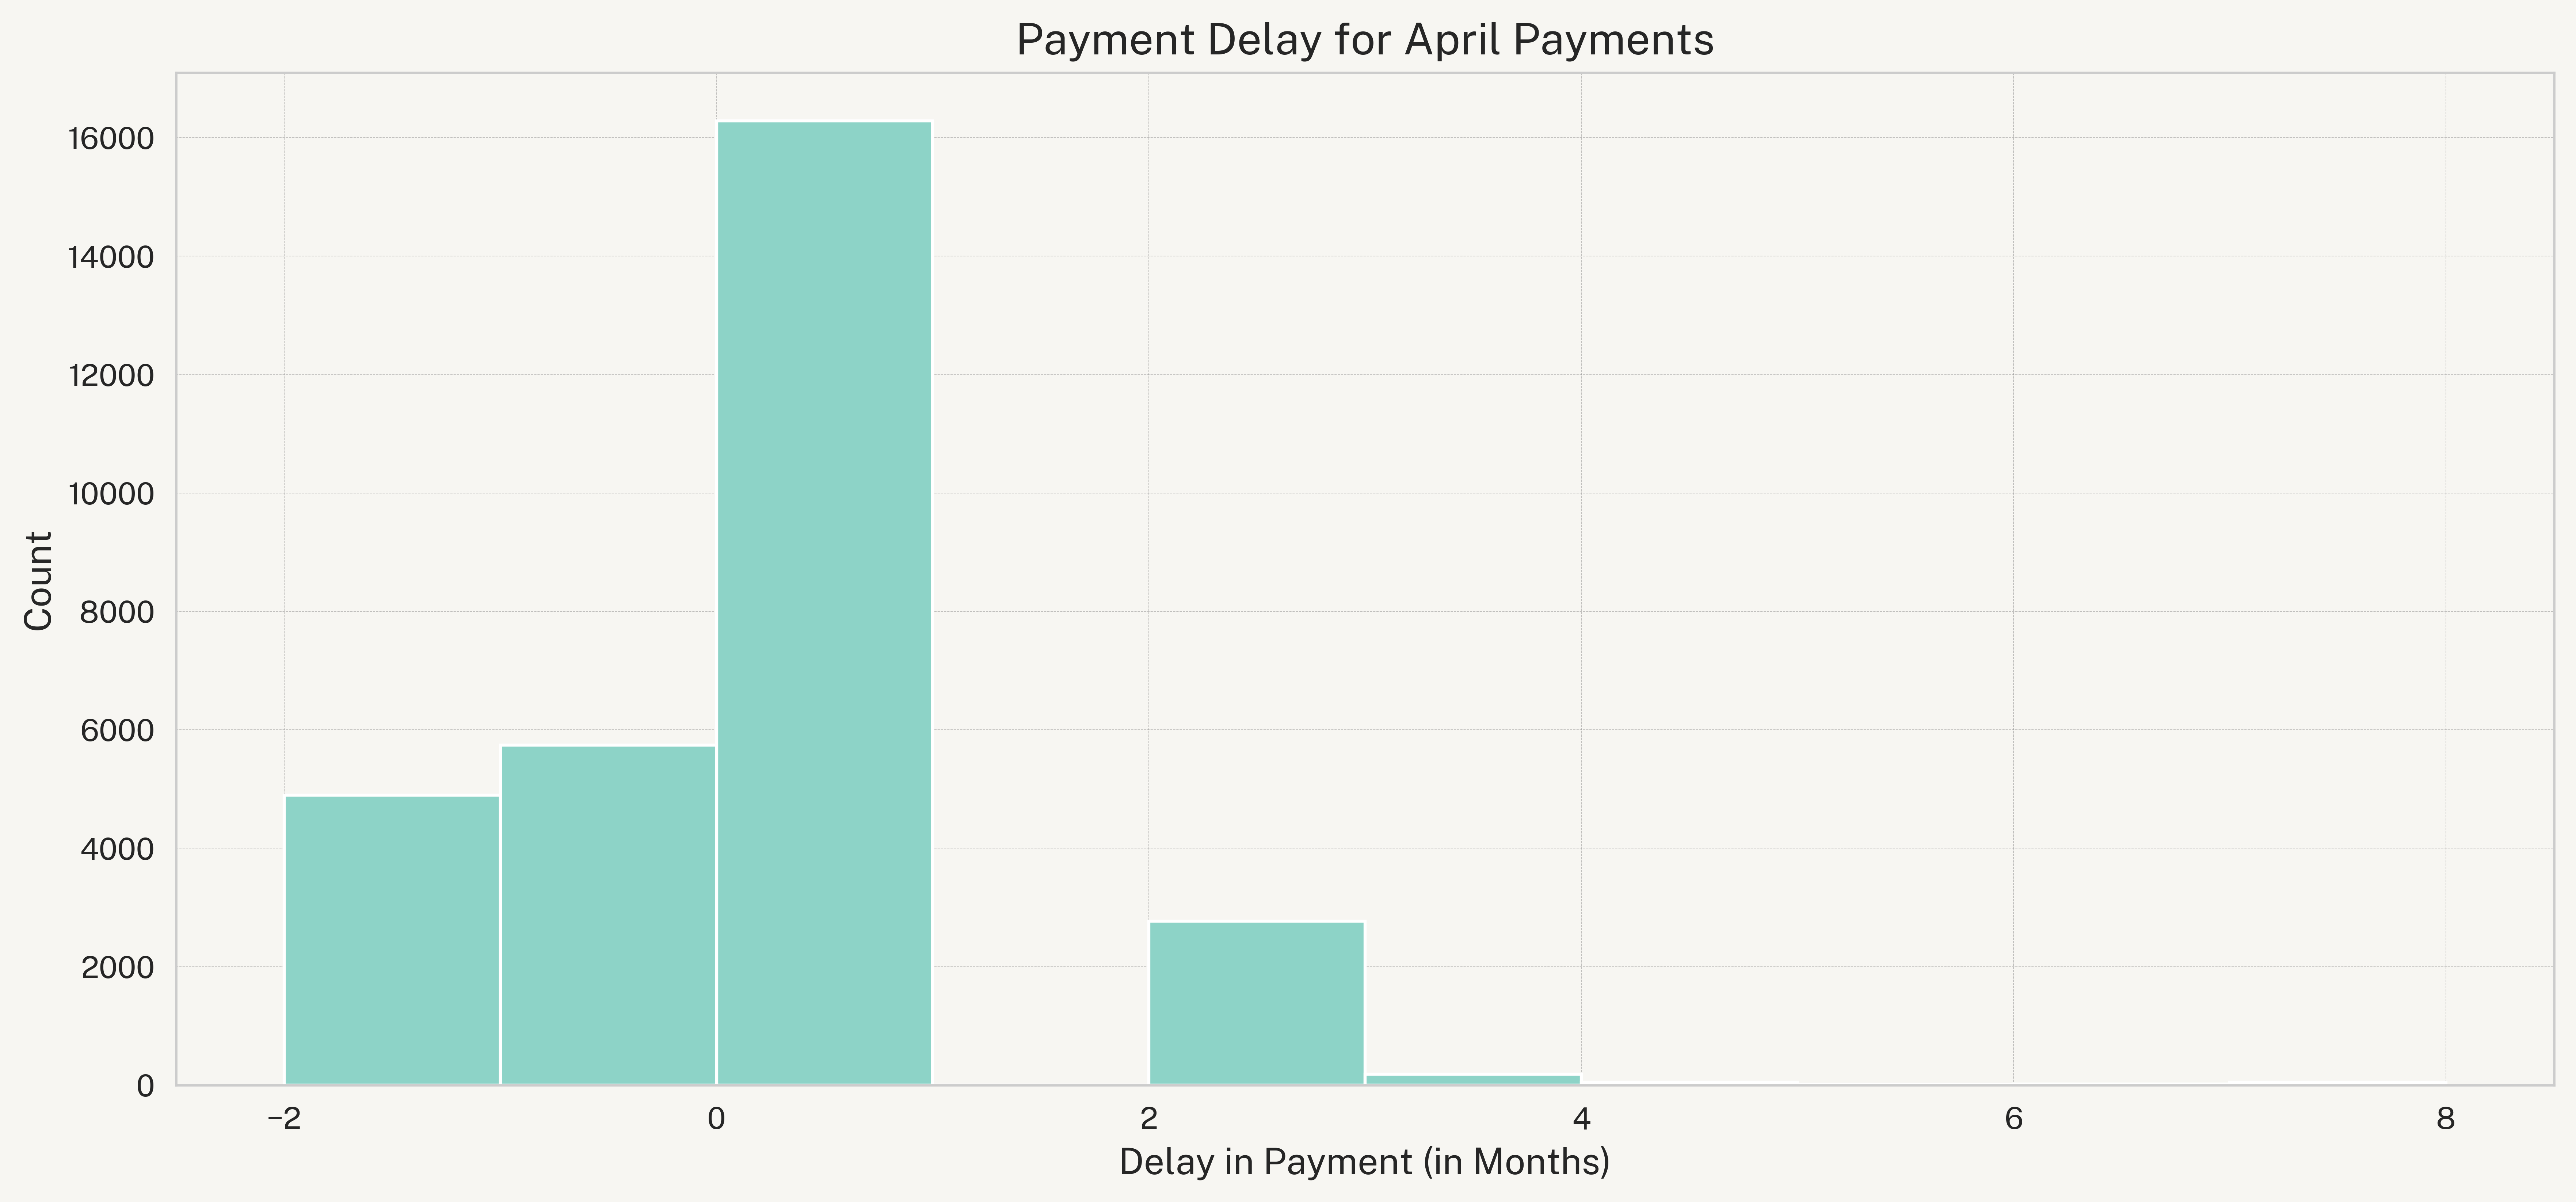

In [83]:
# df['X11'].hist(bins=10)
# plt.xlabel('X11')
# plt.ylabel('Freq')
# plt.title('Pay_6 histogram')
# plt.show()

ax = default_data['PAY_6'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for April Payments")

plt.show()

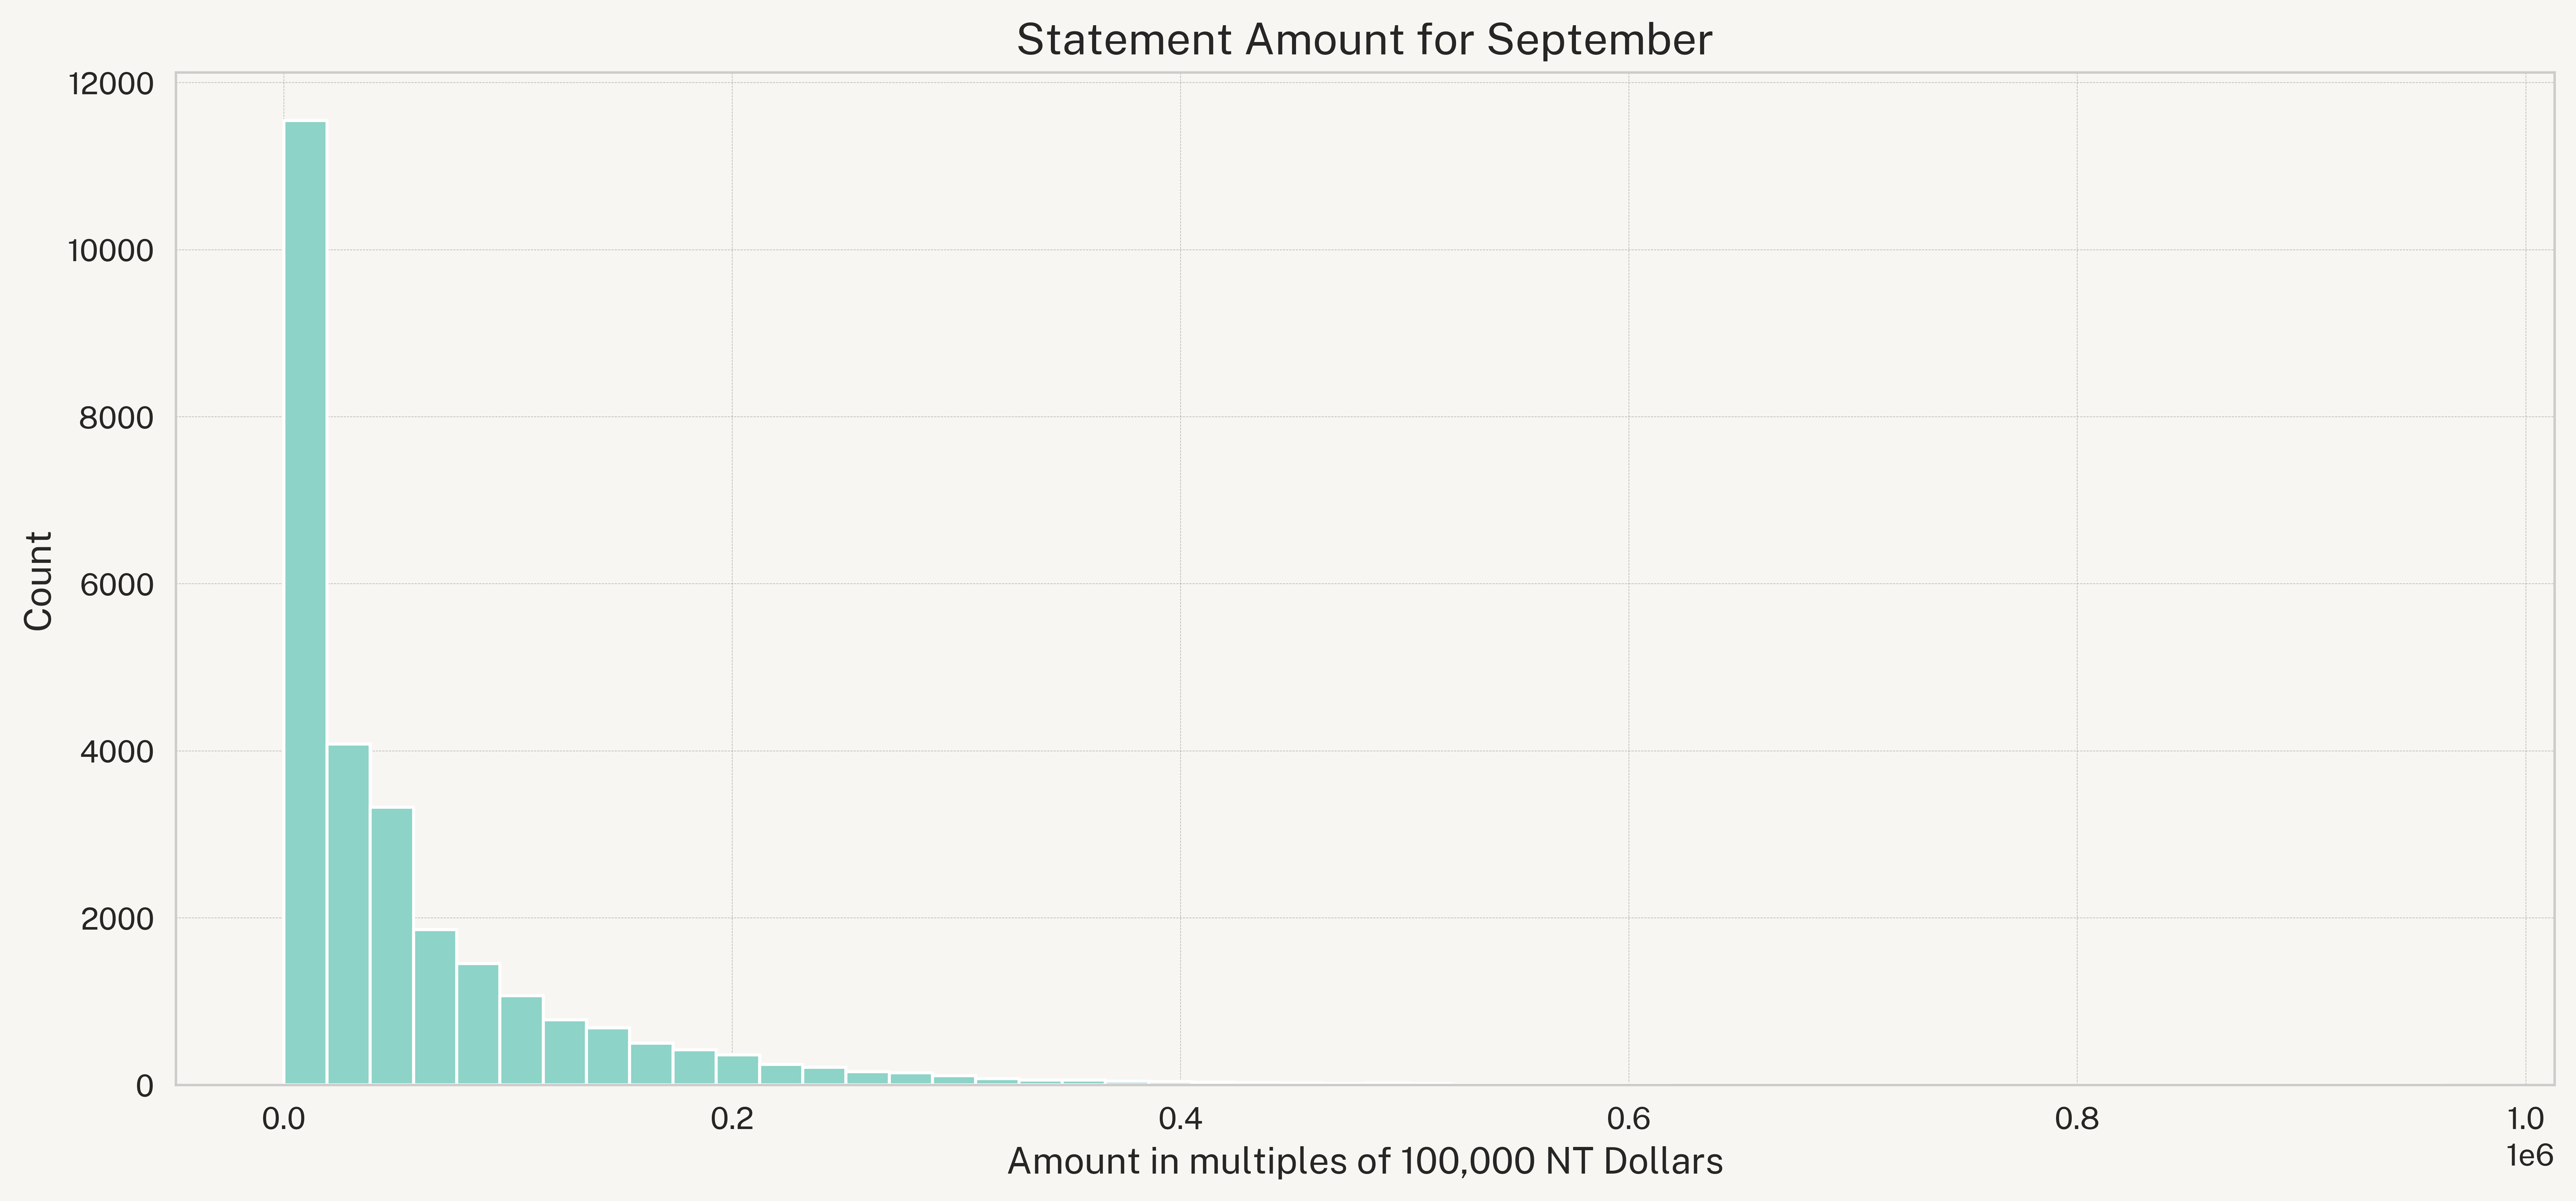

In [91]:
# df['X12'].hist(bins=10)
# plt.xlabel('X12')
# plt.ylabel('Freq')
# plt.title('Bill Amount histogram')
# plt.show()

ax = default_data.loc[default_data['BILL_AMT1'] > 0, 'BILL_AMT1'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for September")

plt.show()

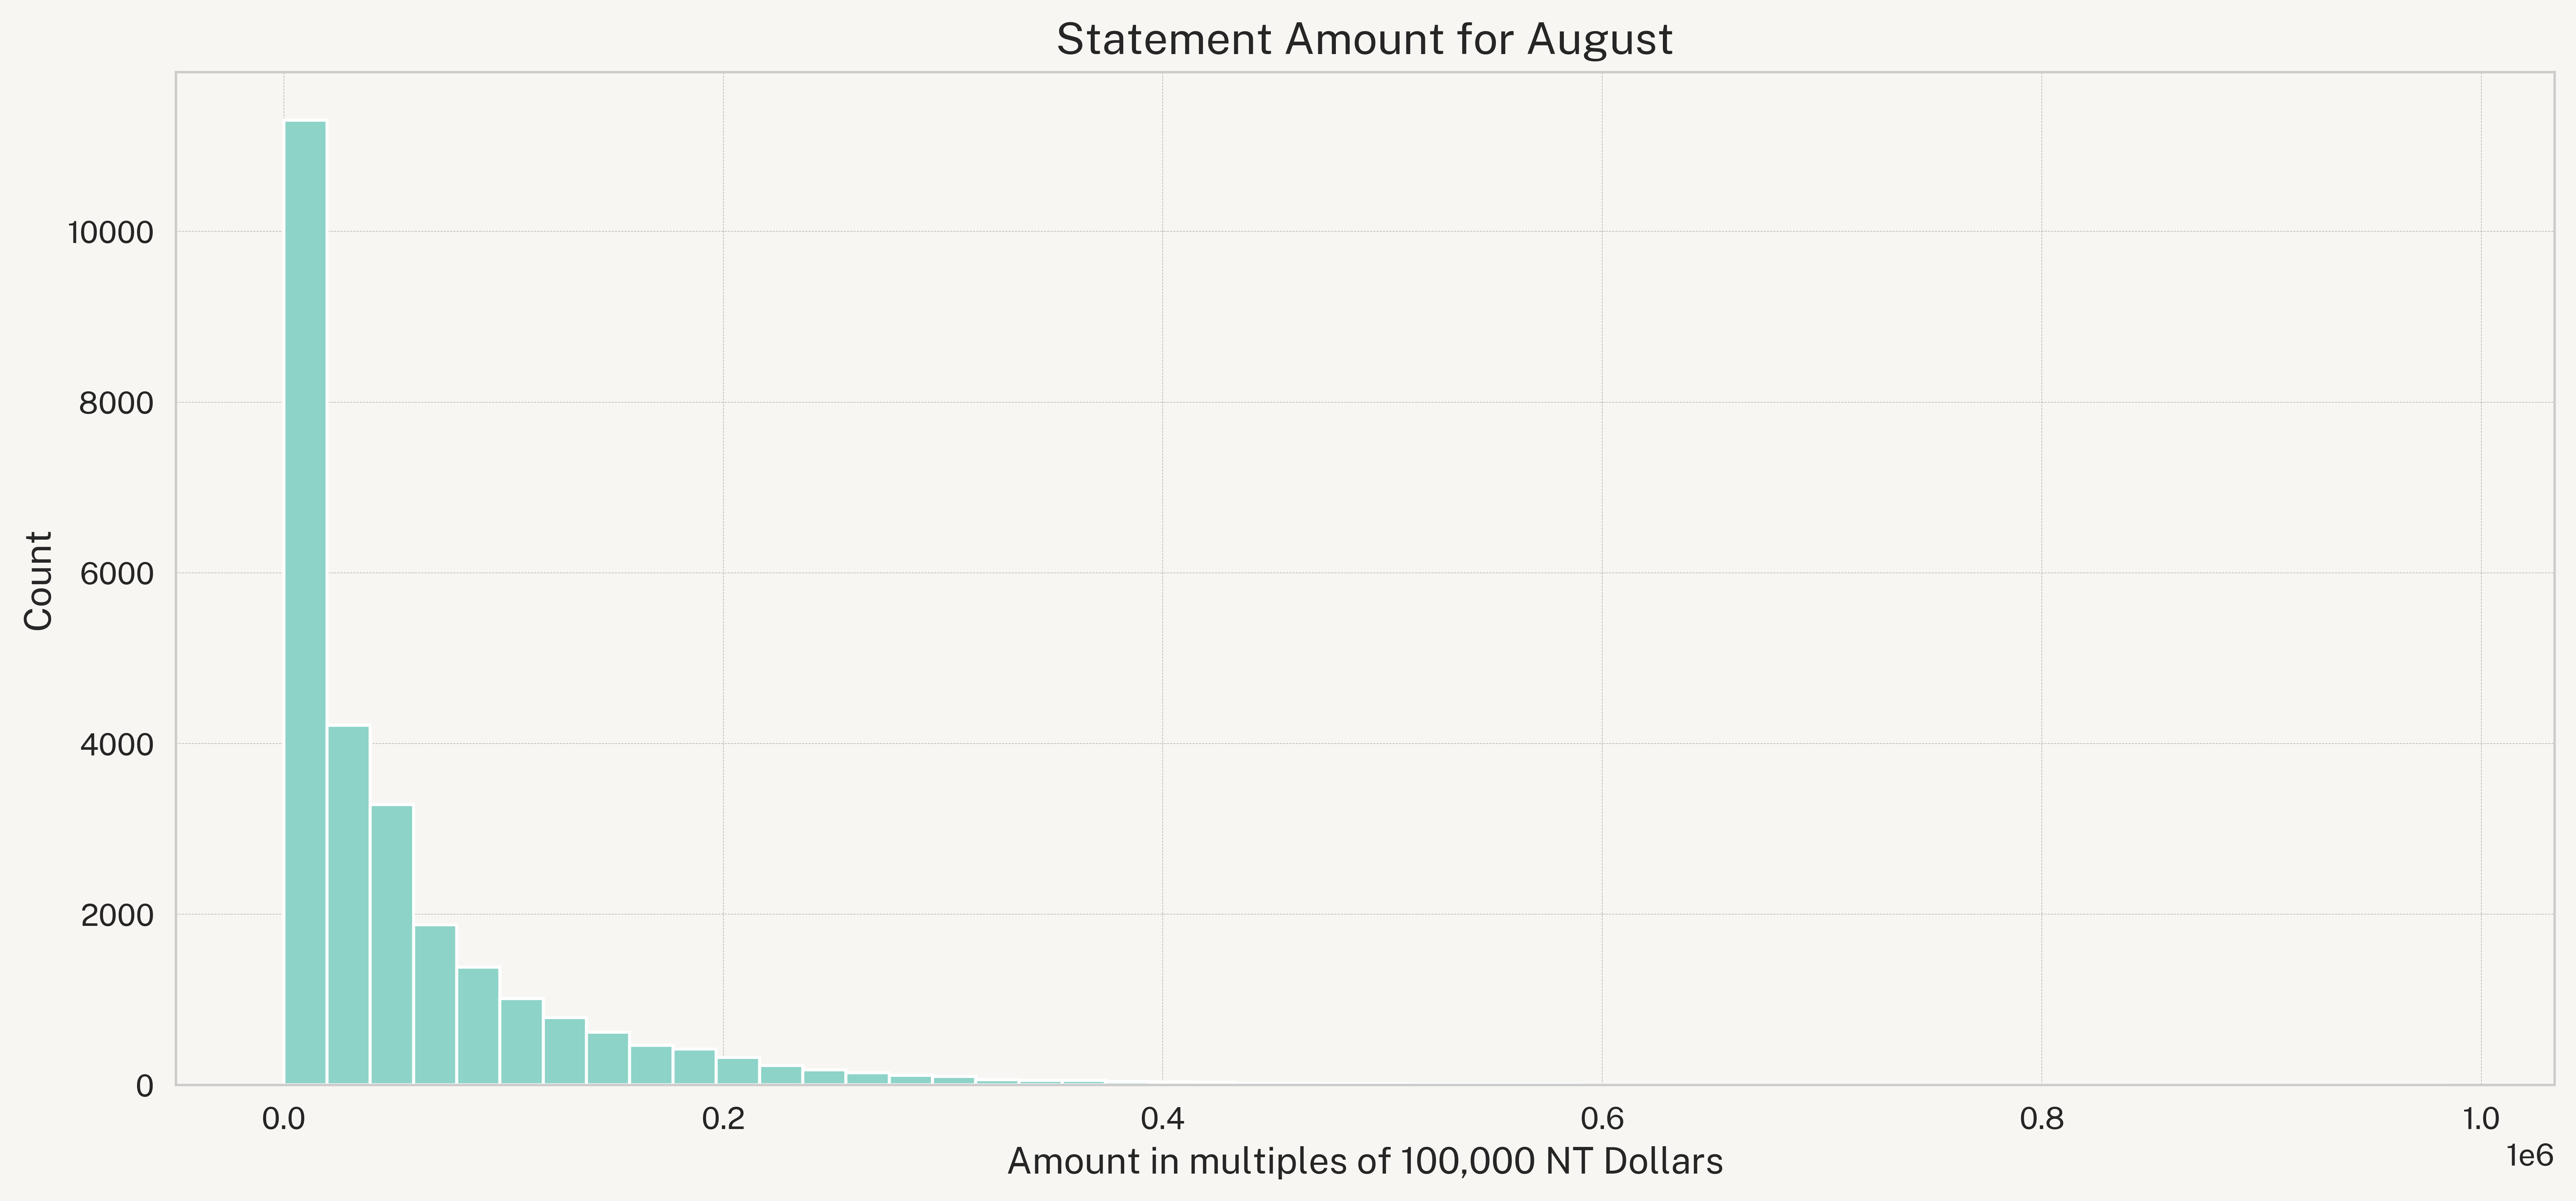

In [92]:
# df['X13'].hist(bins=10)
# plt.xlabel('X13')
# plt.ylabel('Freq')
# plt.title('Bill Amount 2 histogram')
# plt.show()

ax = default_data.loc[default_data['BILL_AMT2'] > 0, 'BILL_AMT2'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for August")

plt.show()

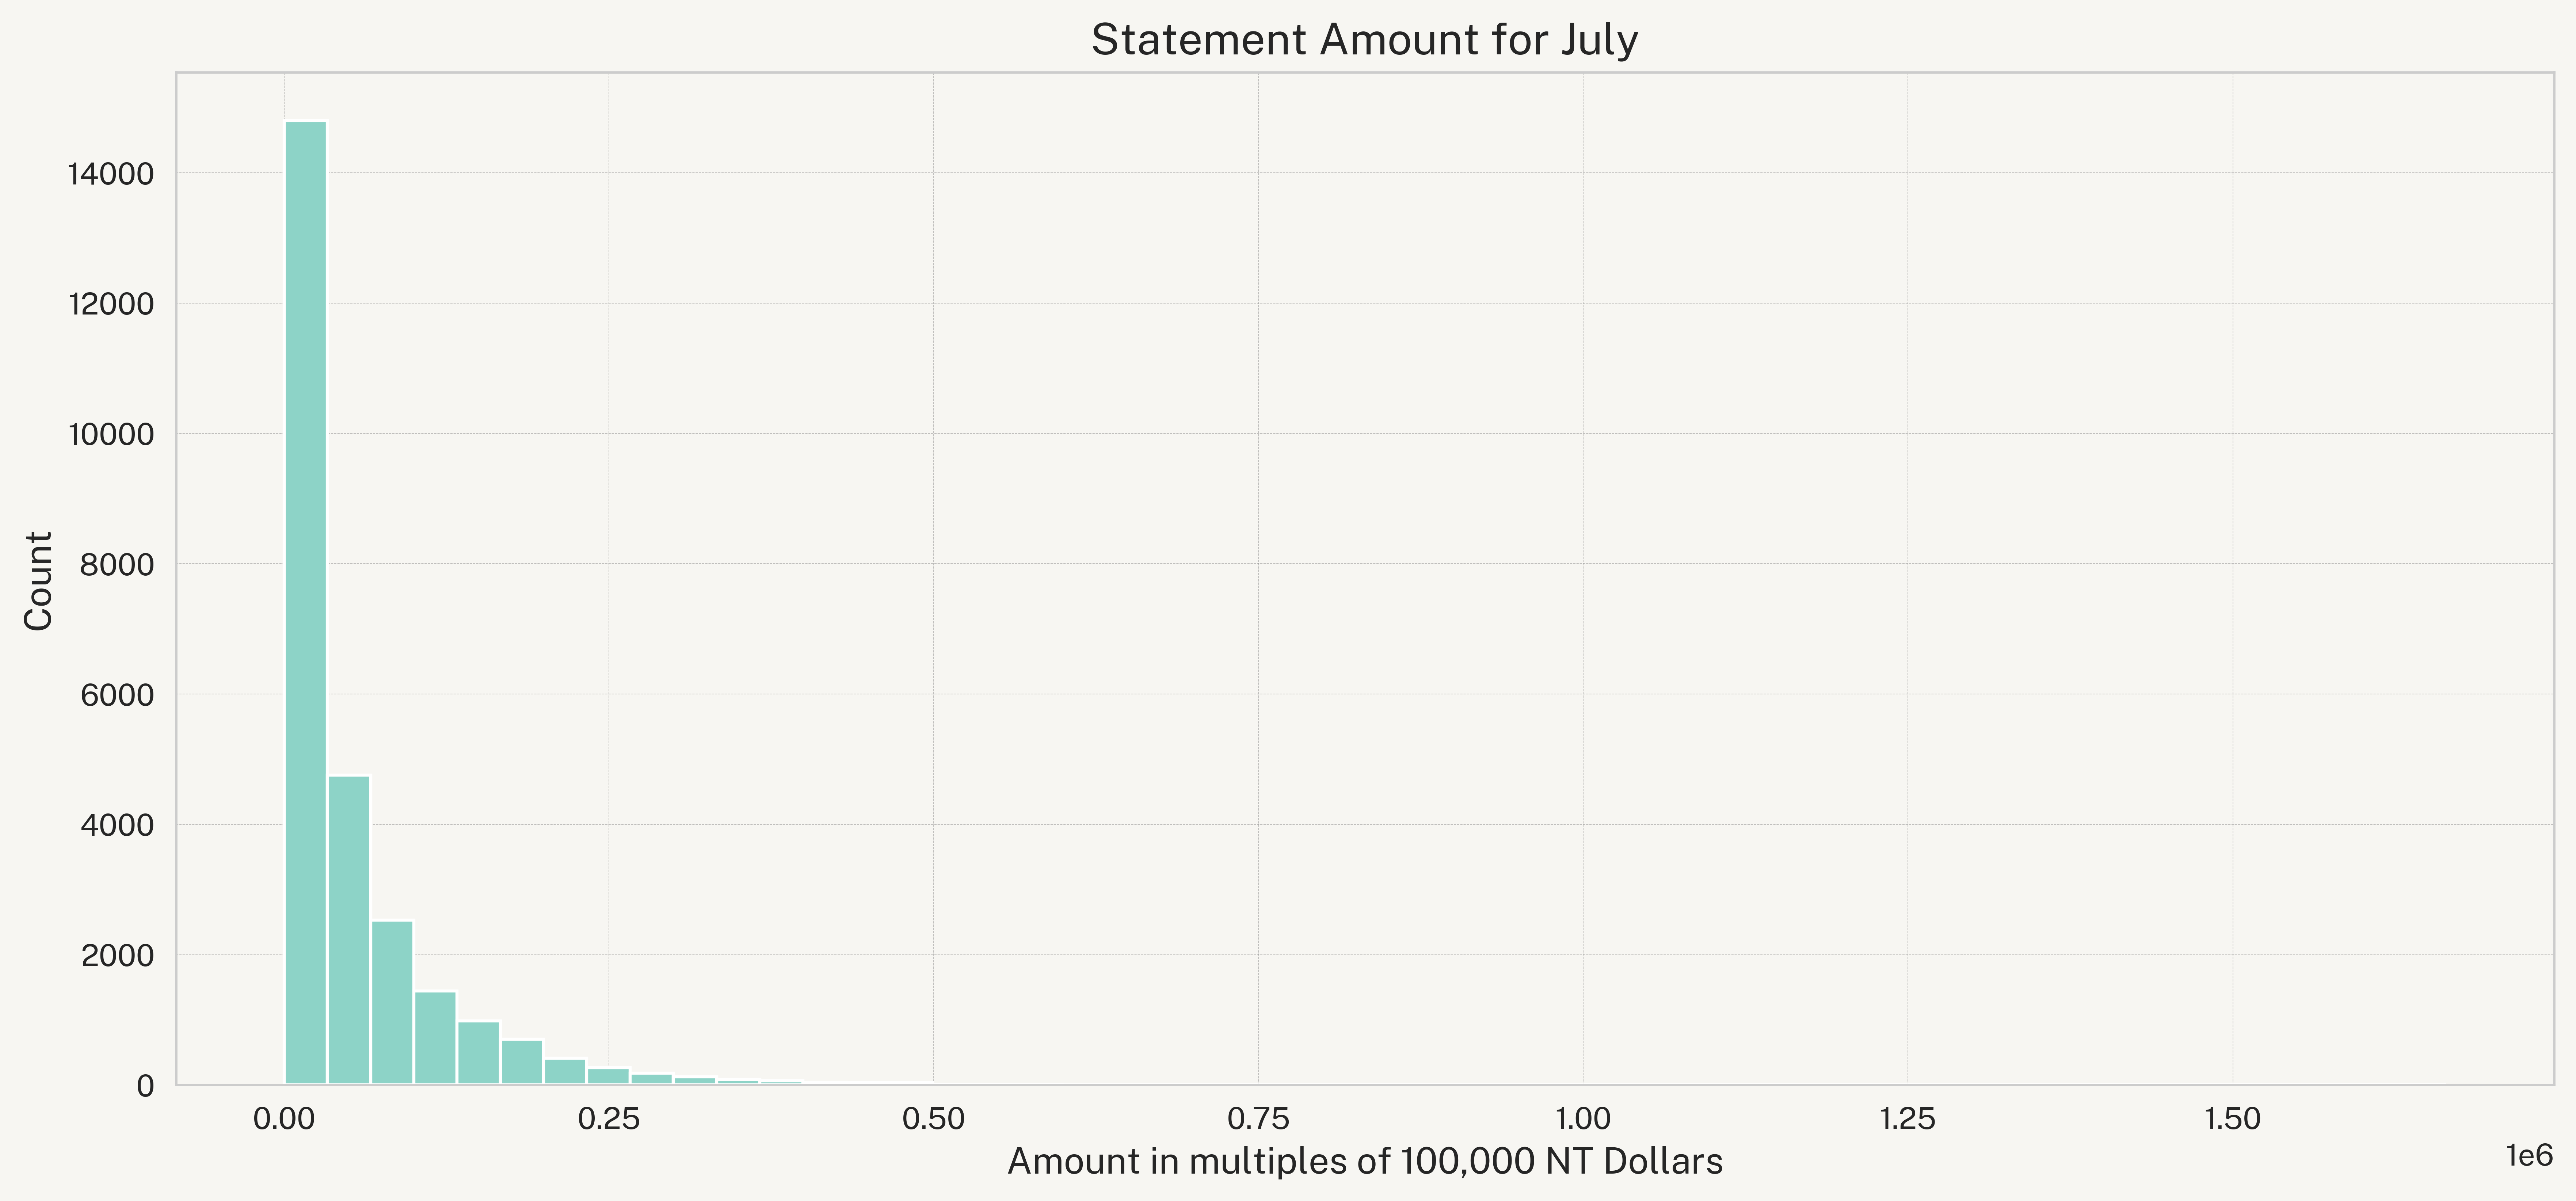

In [93]:
# df['X14'].hist(bins=10)
# plt.xlabel('X14')
# plt.ylabel('Freq')
# plt.title('Bill Amount 3 histogram')

ax = default_data.loc[default_data['BILL_AMT3'] > 0, 'BILL_AMT3'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for July")

plt.show()

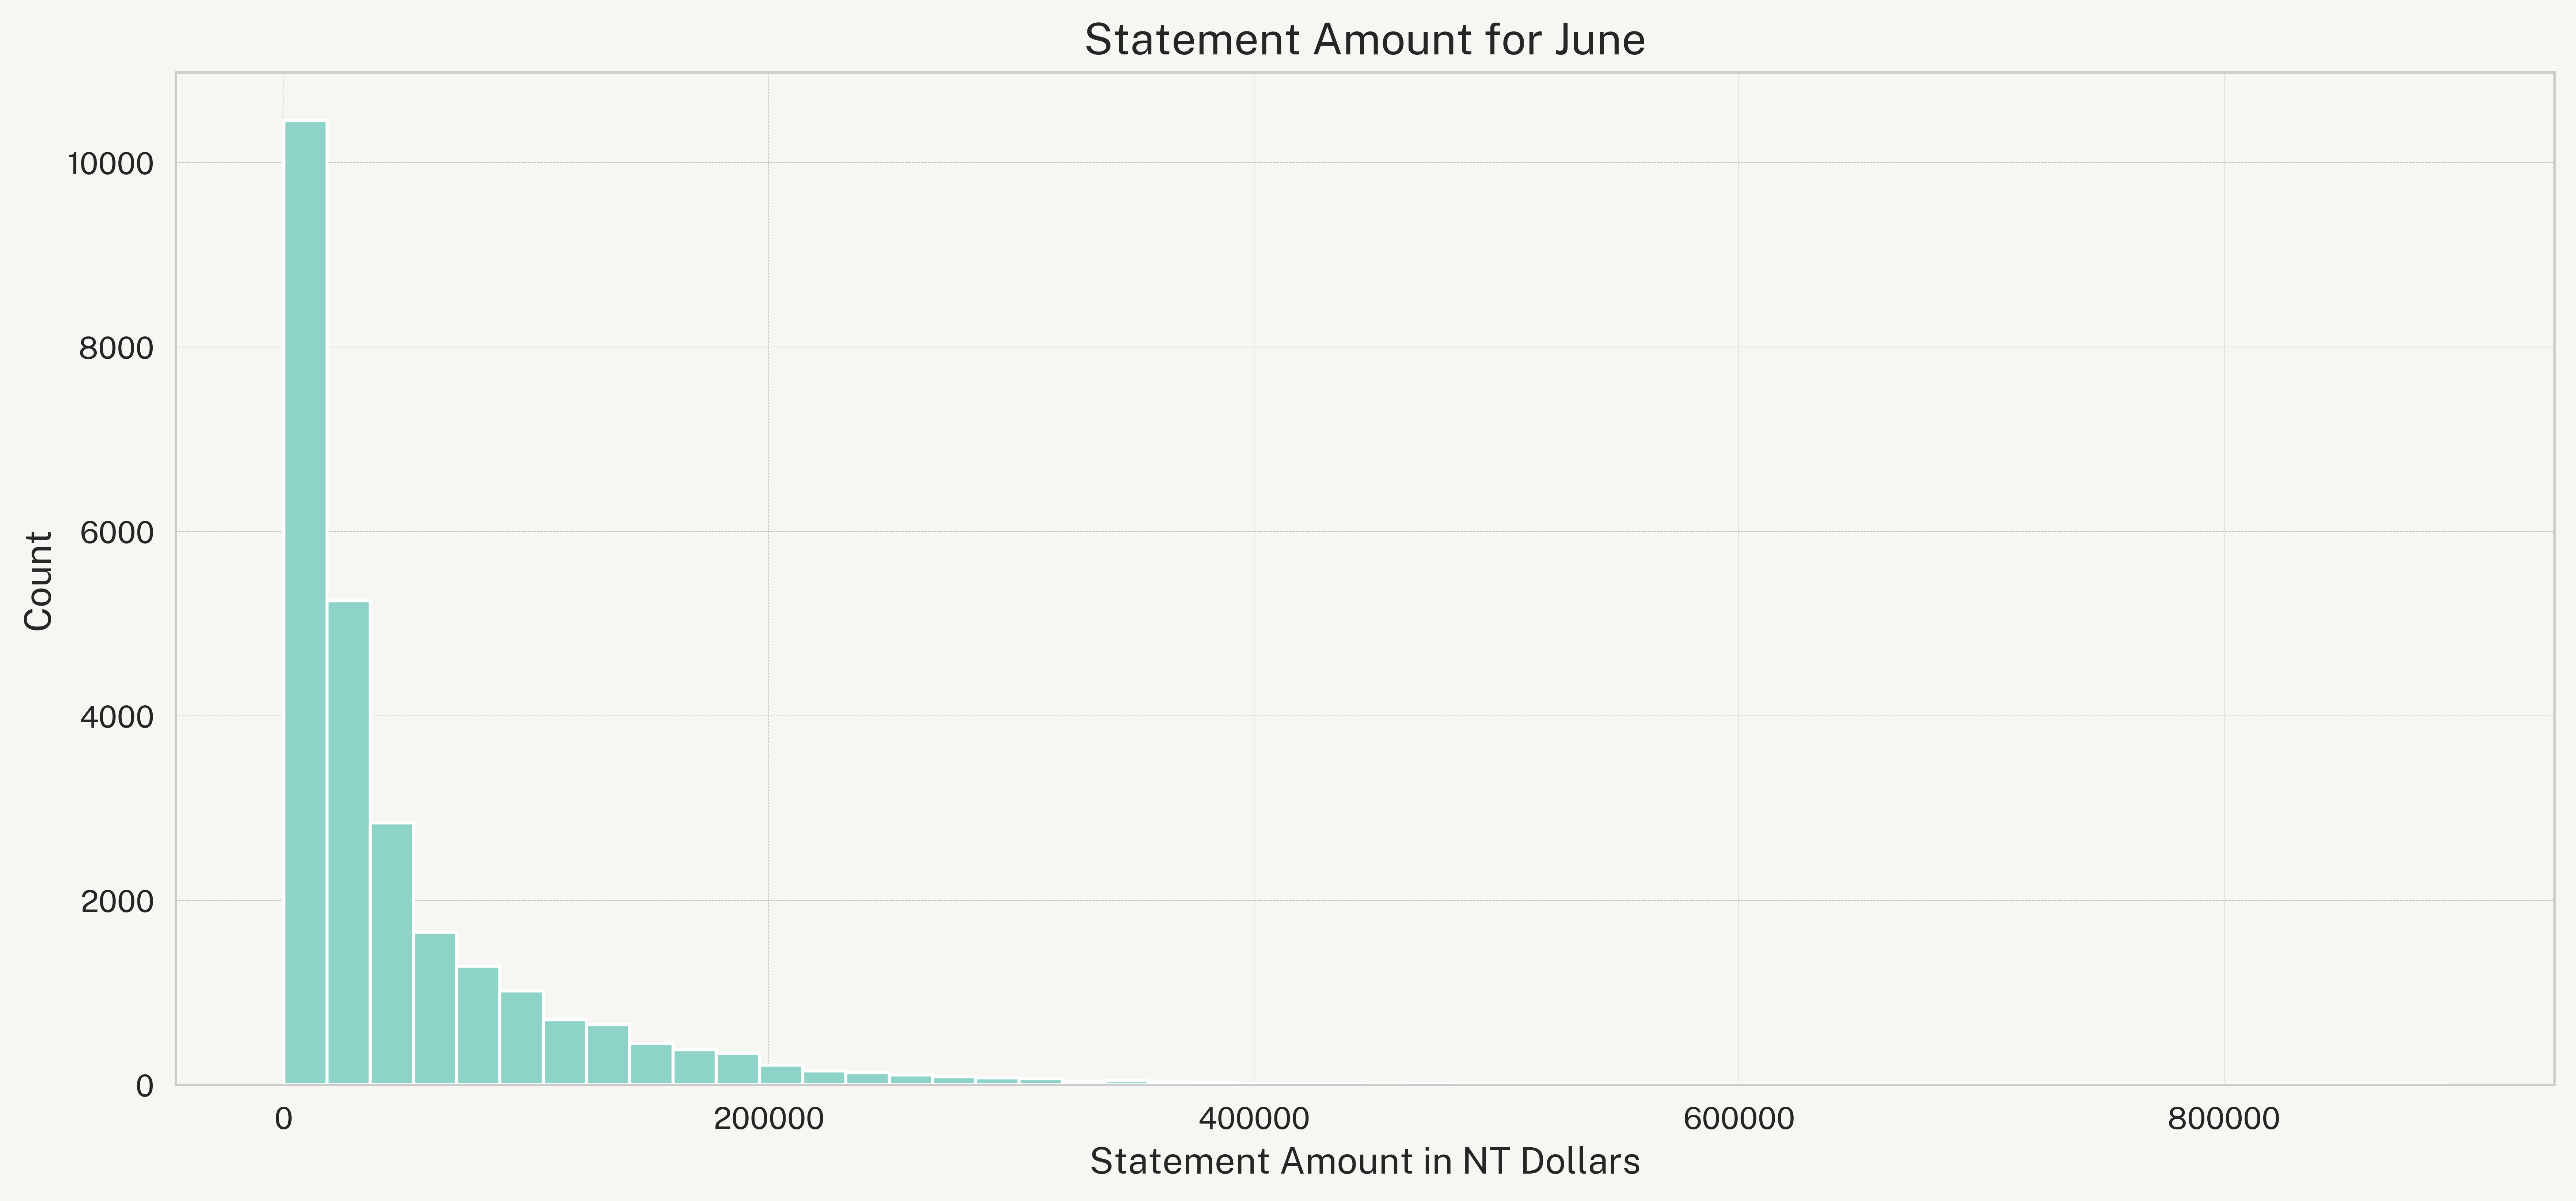

In [96]:
# df['X15'].hist(bins=10)
# plt.xlabel('X15')
# plt.ylabel('Freq')
# plt.title('Bill Amount 4 histogram')

ax = default_data.loc[default_data['BILL_AMT4'] > 0, 'BILL_AMT4'].hist(bins=50)
ax.set_xlabel("Statement Amount in NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for June")

plt.show()

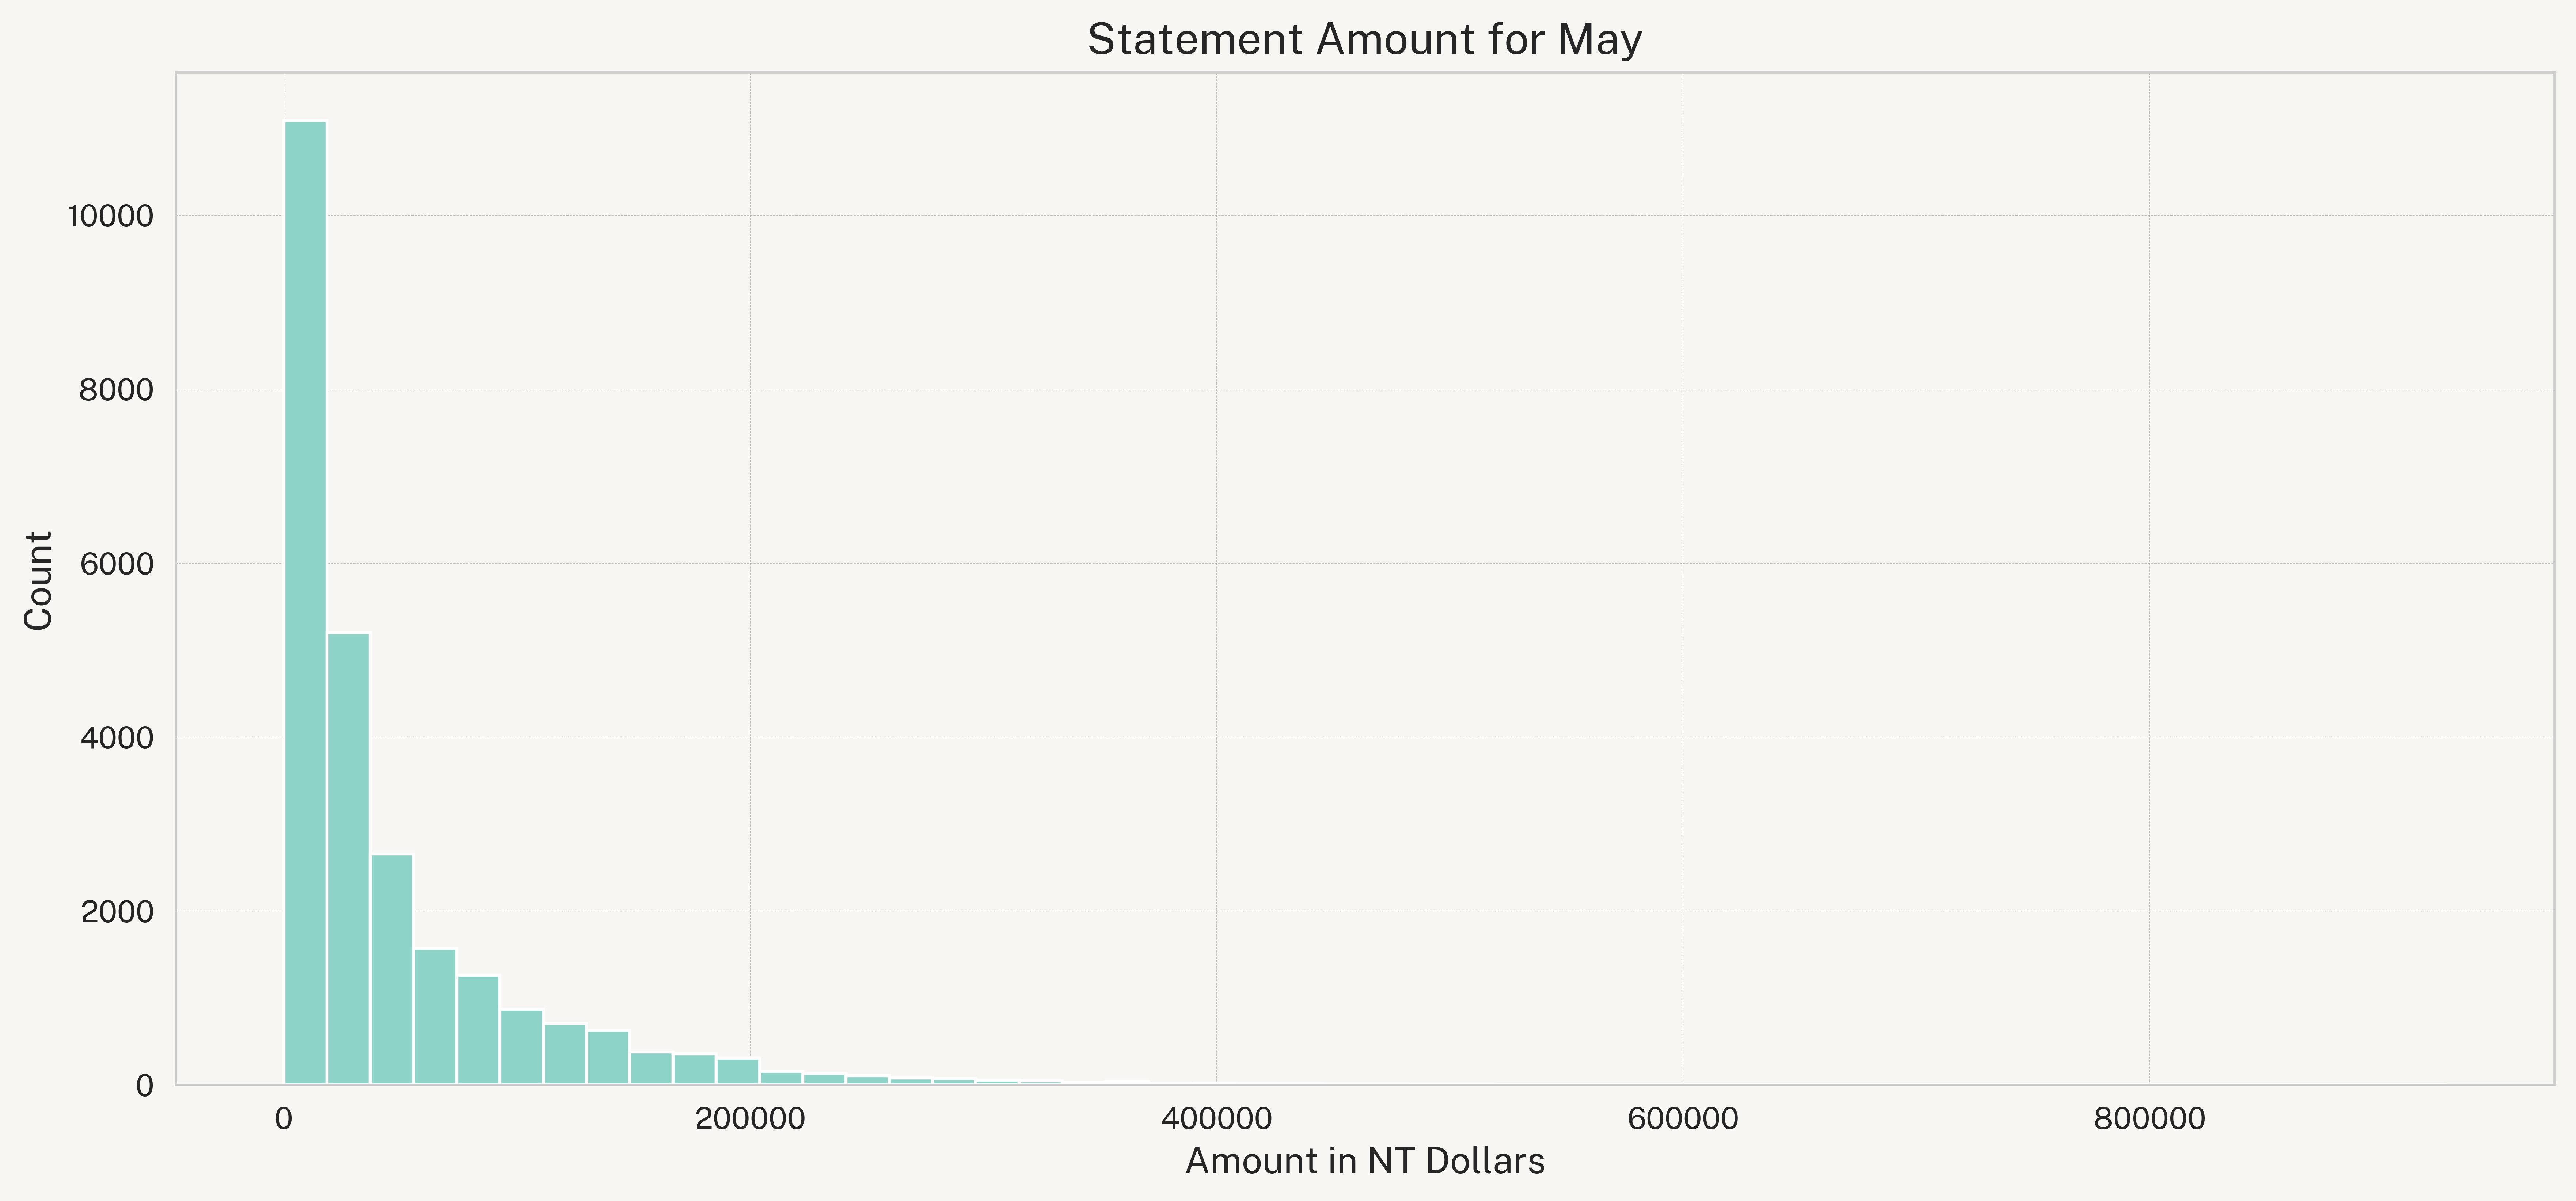

In [97]:
# df['X16'].hist(bins=10)
# plt.xlabel('X16')
# plt.ylabel('Freq')
# plt.title('Bill Amount 5 histogram')

ax = default_data.loc[default_data['BILL_AMT5'] > 0, 'BILL_AMT5'].hist(bins=50)
ax.set_xlabel("Amount in NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for May")

plt.show()

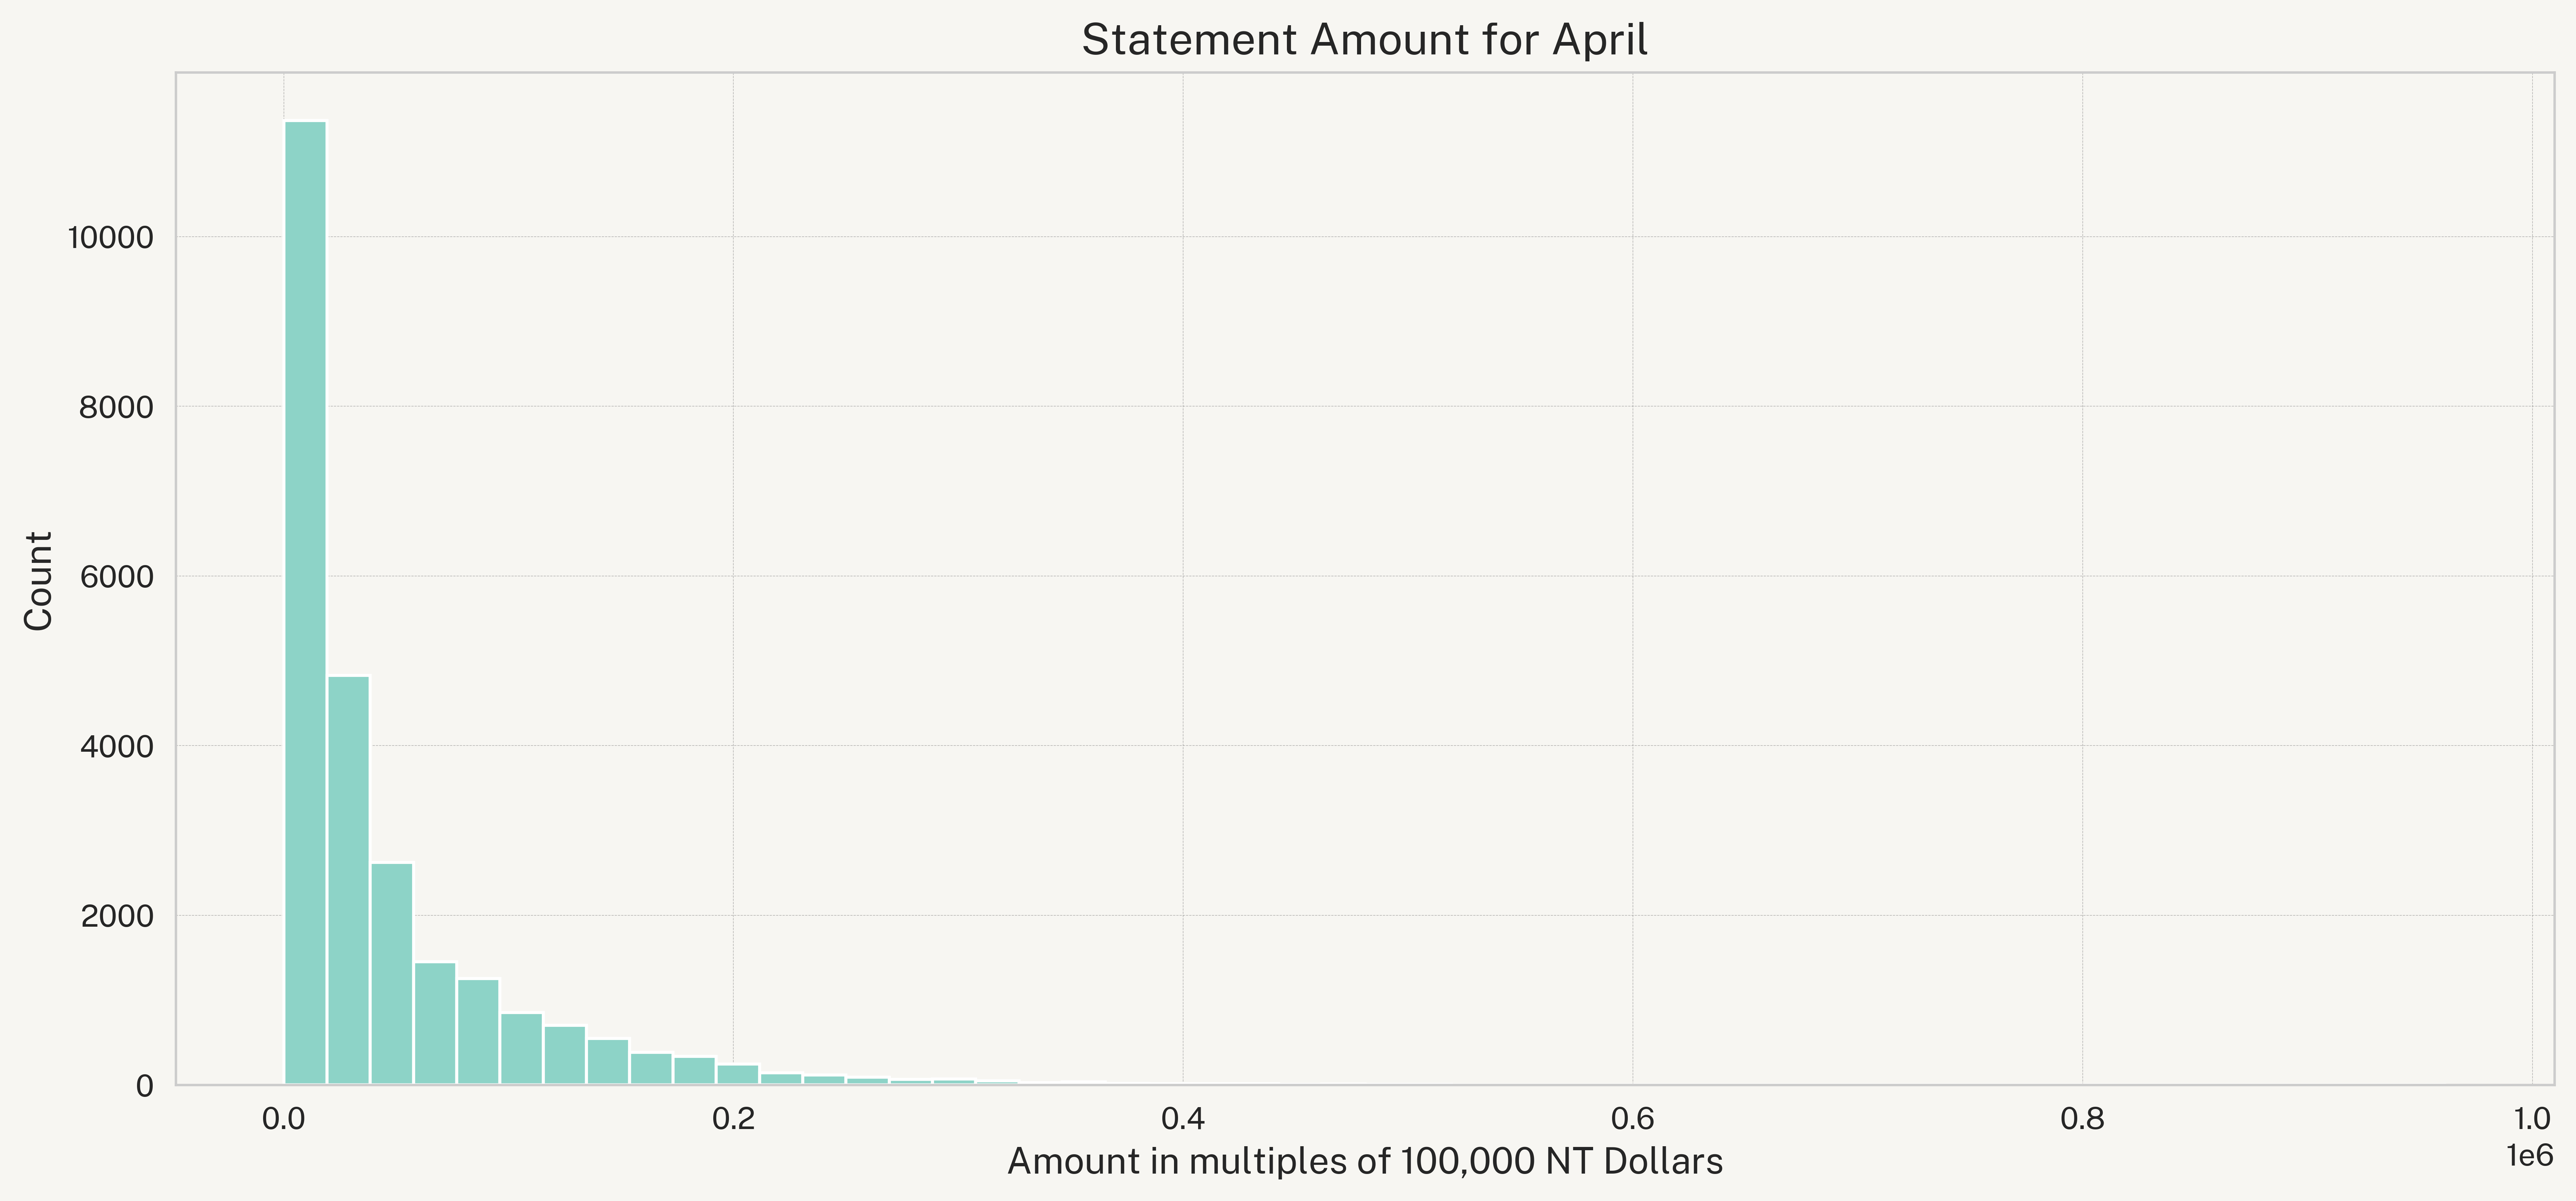

In [99]:
# df['X17'].hist(bins=10)
# plt.xlabel('X17')
# plt.ylabel('Freq')
# plt.title('Bill Amount 6 histogram')

ax = default_data.loc[default_data['BILL_AMT6'] > 0, 'BILL_AMT6'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for April")

plt.show()

In [35]:
df['X18'].hist(bins=10)
plt.xlabel('X18')
plt.ylabel('Freq')
plt.title('Pay Amount 1 histogram')

Text(0.5, 1.0, 'Pay Amount 1 histogram')

In [36]:
df['X19'].hist(bins=10)
plt.xlabel('X19')
plt.ylabel('Freq')
plt.title('Pay Amount 2 histogram')

Text(0.5, 1.0, 'Pay Amount 2 histogram')

In [37]:
df['X20'].hist(bins=10)
plt.xlabel('X20')
plt.ylabel('Freq')
plt.title('Pay Amount 3 histogram')

Text(0.5, 1.0, 'Pay Amount 3 histogram')

In [38]:
df['X21'].hist(bins=10)
plt.xlabel('X21')
plt.ylabel('Freq')
plt.title('Pay Amount 4 histogram')

Text(0.5, 1.0, 'Pay Amount 4 histogram')

In [39]:
df['X22'].hist(bins=10)
plt.xlabel('X22')
plt.ylabel('Freq')
plt.title('Pay Amount 5 histogram')

Text(0.5, 1.0, 'Pay Amount 5 histogram')

In [40]:
df['X23'].hist(bins=10)
plt.xlabel('X23')
plt.ylabel('Freq')
plt.title('Pay Amount 6 histogram')

Text(0.5, 1.0, 'Pay Amount 6 histogram')

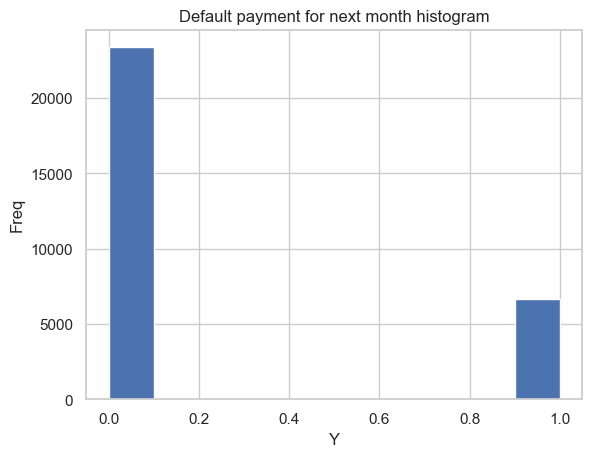

In [67]:
df['Y'].hist(bins=10)
plt.xlabel('Y')
plt.ylabel('Freq')
plt.title('Default payment for next month histogram')
plt.show()

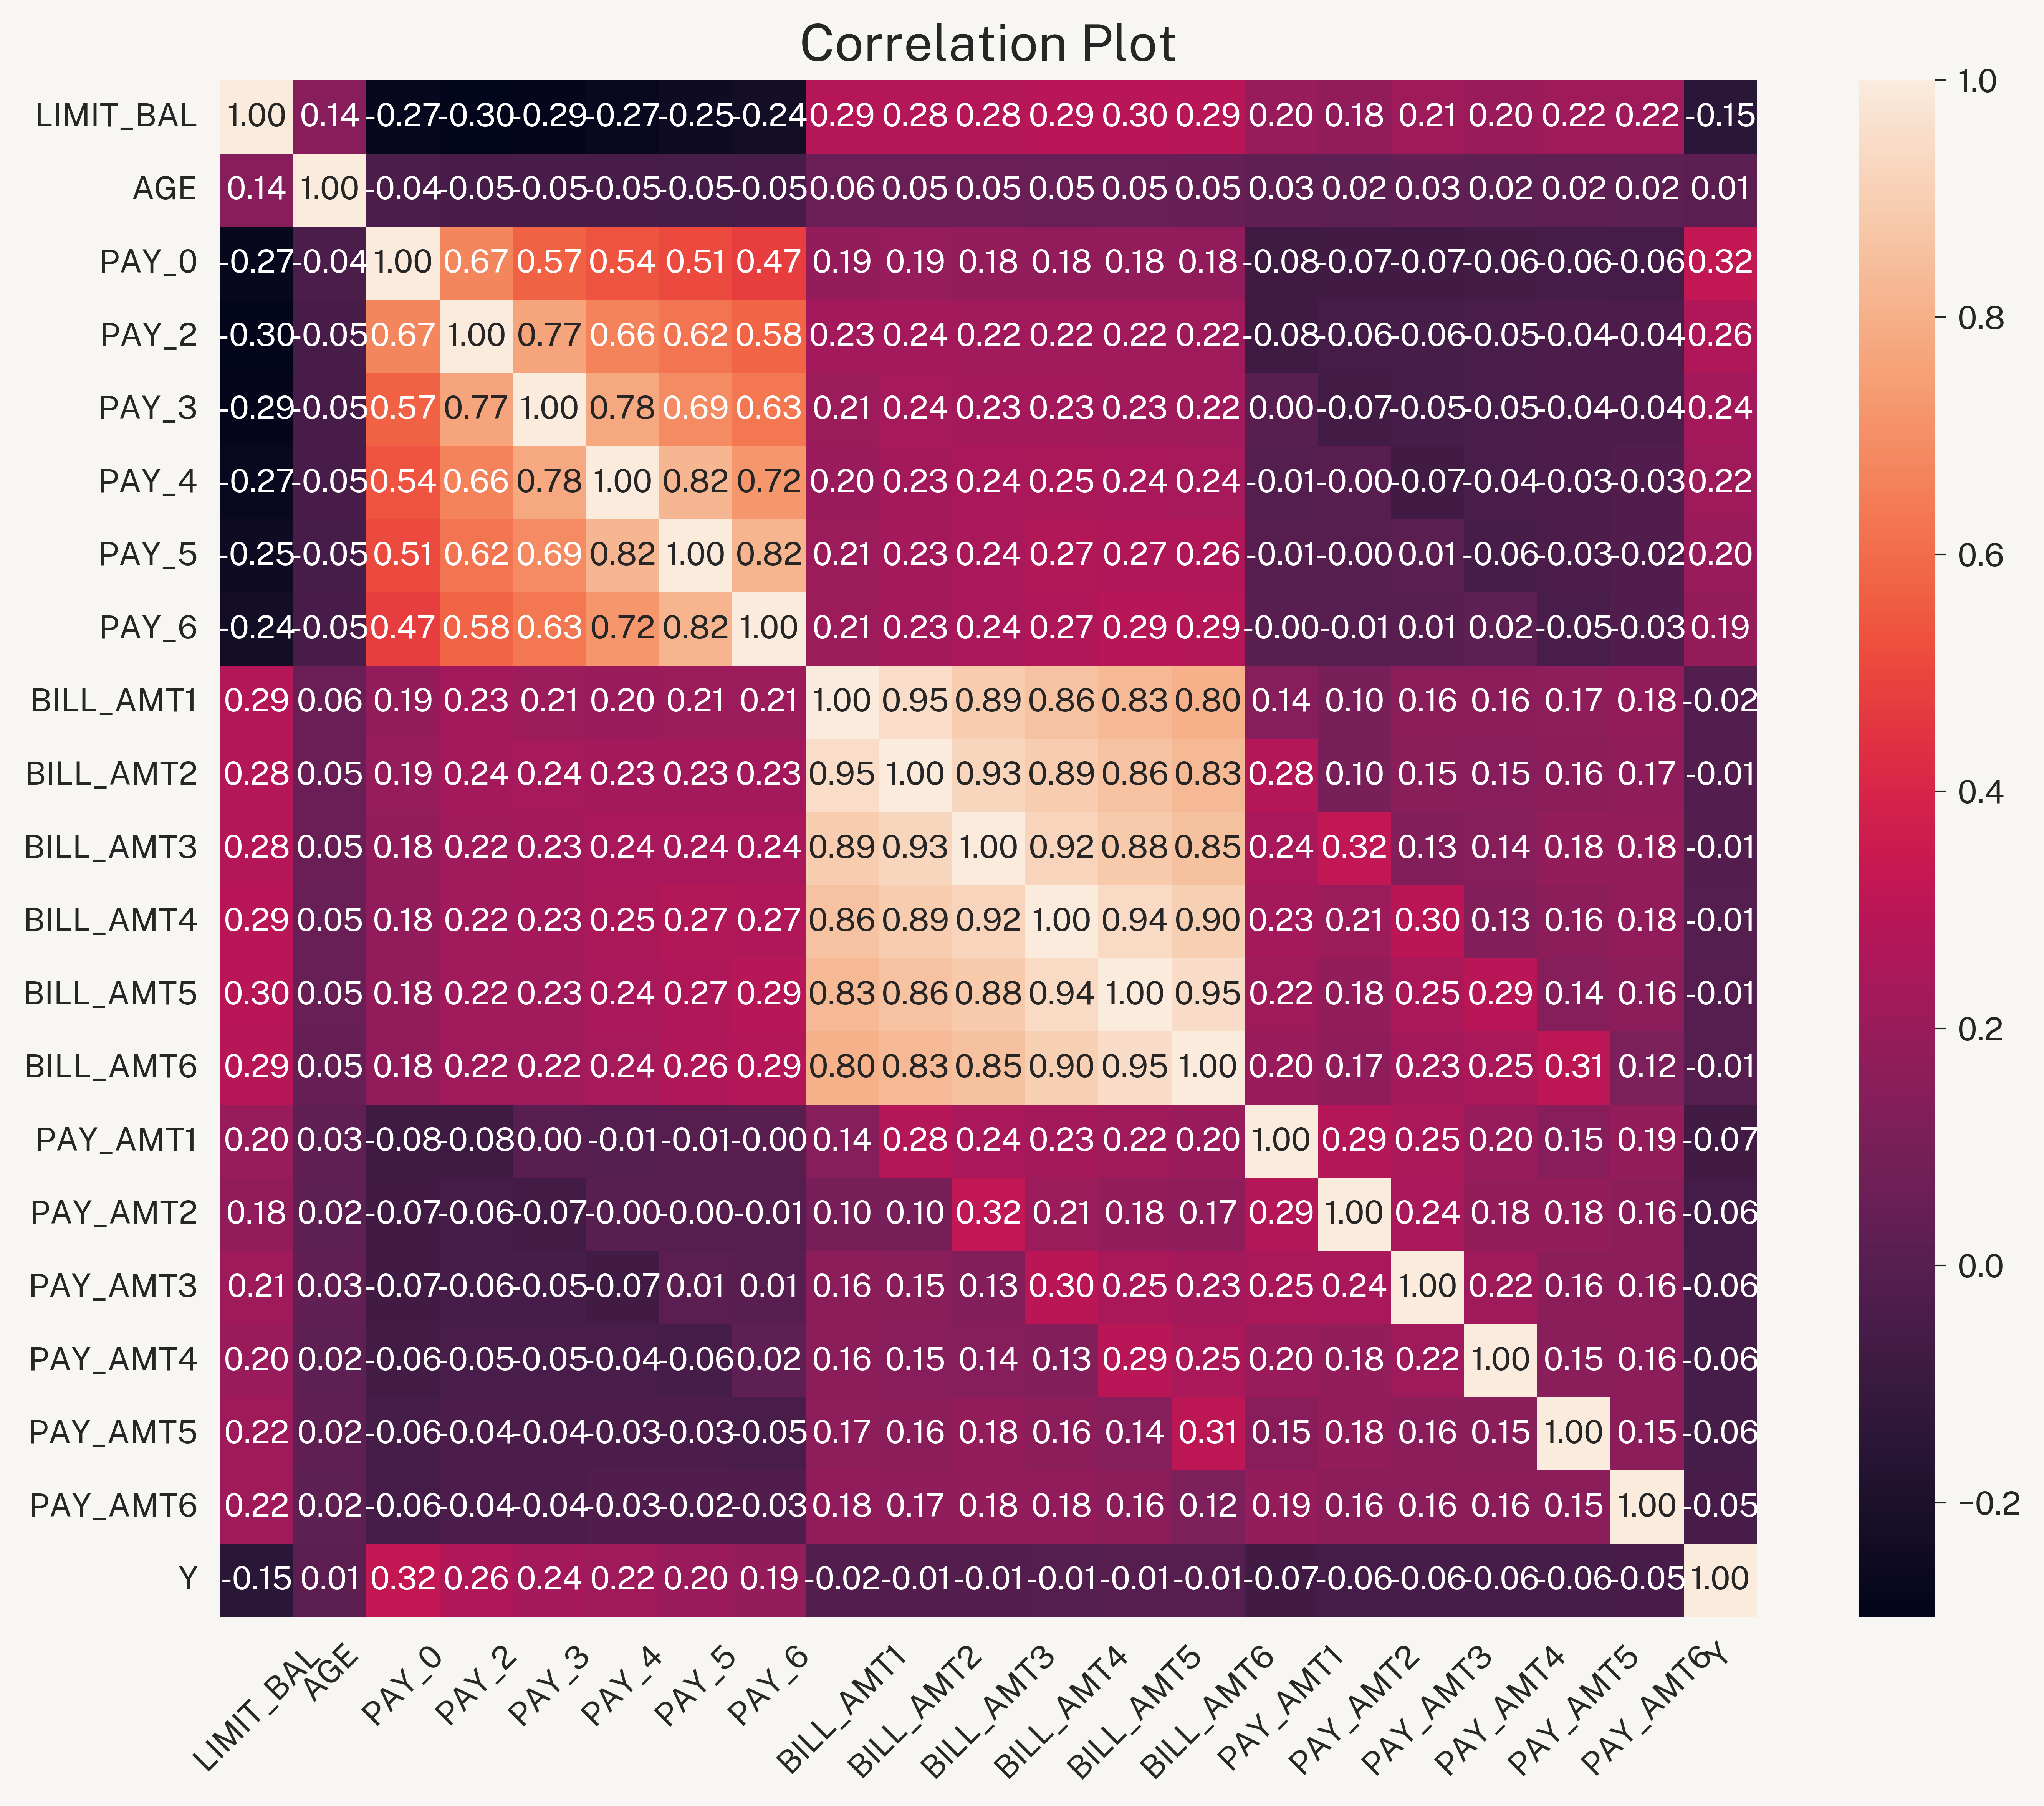

In [108]:
# Compute the correlation matrix
corr_matrix = default_data.drop(['MARRIAGE', 'EDUCATION', 'SEX'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, 
            annot=True,       # Display correlation values
            cmap='rocket',  # Color map
            fmt=".2f",        # Format for the correlation values
            cbar=True,        # Add a color bar
            square=True,      # Make the cells square
            annot_kws={"size": 10})  # Adjust text size
plt.title('Correlation Plot', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()       # Adjust layout to fit the plot nicely
plt.show()

#### Train Test Split

In [109]:
# X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
#        'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
#        'X21', 'X22', 'X23']]
# Y = df[['Y']]

# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=6304)

X = default_data.drop('Y', axis=1)
Y = default_data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=6304)

#### Standardization

In [111]:
#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train.drop(['SEX', "EDUCATION", "MARRIAGE"], axis=1))

In [112]:
scaled_data 

array([[-1.13405372, -1.4614243 ,  1.79834878, ..., -0.24466443,
        -0.15336173, -0.2951568 ],
       [-0.28862639, -1.02686746, -0.87853266, ..., -0.12525469,
         0.31869528,  0.20656807],
       [-0.90348263,  0.38544226,  2.69064259, ...,  3.48806593,
        -0.26236435, -0.24617366],
       ...,
       [-0.36548342, -0.37503221, -0.87853266, ..., -0.20502406,
        -0.31932186, -0.25079577],
       [ 0.32622985,  4.2964538 ,  0.01376115, ...,  0.14624216,
         0.17855854,  0.13323428],
       [-0.36548342, -1.13550667,  0.90605497, ..., -0.29963567,
        -0.31932186, -0.2951568 ]])

In [113]:
scaled_cols = [X_train.drop(['SEX', "EDUCATION", "MARRIAGE"], axis=1).columns]

In [114]:
scaled_cols

[Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
        'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
       dtype='object')]

In [115]:
scaled_data_df = pd.DataFrame(scaled_data, columns=scaled_cols)

In [116]:
scaled_data_df

LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
0     -1.134054 -1.461424  1.798349  1.783710  1.806087  1.891397  0.230444   
1     -0.288626 -1.026867 -0.878533 -0.728348 -0.700768 -0.670032 -0.652108   
2     -0.903483  0.385442  2.690643  2.621062  1.806087  1.891397  1.995548   
3      1.402228  0.059525  0.013761  0.109005  0.134850  0.183778  0.230444   
4      1.094800  0.168164 -1.770826 -1.565700 -0.700768  0.183778  0.230444   
...         ...       ...       ...       ...       ...       ...       ...   
22495  0.479944 -1.026867  0.013761  0.109005  0.134850  0.183778  0.230444   
22496  0.479944  1.906391  0.906055 -1.565700 -1.536387 -1.523842 -1.534660   
22497 -0.365483 -0.375032 -0.878533 -0.728348 -0.700768 -0.670032 -0.652108   
22498  0.326230  4.296454  0.013761  0.109005  0.134850  0.183778  0.230444   
22499 -0.365483 -1.135507  0.906055 -1.565700 -0.700768 -0.670032 -0.652108   

          PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6  \
0      0.253575 -0.615812 -0.584259 -0.558211 -0.547826 -0.520098 -0.467447   
1     -0.618549 -0.543292 -0.644480 -0.551978 -0.584236 -0.613499 -0.489659   
2     -1.490674  0.189384  0.140759  0.121745  0.163828 -0.330617 -0.316436   
3      0.253575  2.402448  2.538463  2.659642  2.570241  2.763021  2.524350   
4      0.253575 -0.692853 -0.688218 -0.597328 -0.571747 -0.545870 -0.501587   
...         ...       ...       ...       ...       ...       ...       ...   
22495  0.253575 -0.657224 -0.637148 -0.607502 -0.618332 -0.592011 -0.564600   
22496 -1.490674 -0.692853 -0.688218 -0.673669 -0.667890 -0.659754 -0.649325   
22497  0.253575 -0.686186 -0.688218 -0.658230 -0.664933 -0.634614 -0.623592   
22498  0.253575  2.065240  2.143775  2.170547  2.454804  2.681937  2.839480   
22499 -1.490674 -0.692853 -0.688218 -0.500610 -0.644092 -0.659754 -0.649325   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0     -0.216376 -0.210779 -0.286743 -0.244664 -0.153362 -0.295157  
1     -0.148398  0.108838  0.008470 -0.125255  0.318695  0.206568  
2     -0.333579 -0.160910 -0.286743  3.488066 -0.262364 -0.246174  
3      0.223313  0.126459  0.119141  0.189669  0.169331  0.100034  
4     -0.333579 -0.025225 -0.232704 -0.238557 -0.186554 -0.182422  
...         ...       ...       ...       ...       ...       ...  
22495 -0.270641 -0.204711 -0.229462 -0.238557 -0.252938 -0.013321  
22496 -0.333579 -0.248180 -0.286743 -0.299636 -0.319322 -0.295157  
22497 -0.333579 -0.203090 -0.276314 -0.205024 -0.319322 -0.250796  
22498  0.234857  0.117940  0.199604  0.146242  0.178559  0.133234  
22499 -0.333579  0.257240 -0.202821 -0.299636 -0.319322 -0.295157  

[22500 rows x 20 columns]

#### Principal Component Analysis

In [117]:
#Apply PCA
pca = PCA(n_components=0.95)  # Specify the number of components you want
pca_data = pca.fit_transform(scaled_data)

#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.32661763 0.20443479 0.07687382 0.05003021 0.04661187 0.04438139
 0.04353552 0.03793481 0.0351045  0.03479559 0.02955301 0.02014824]


In [118]:
pca_data.shape

(22500, 12)

In [119]:
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

ValueError: Shape of passed values is (22500, 12), indices imply (22500, 7)

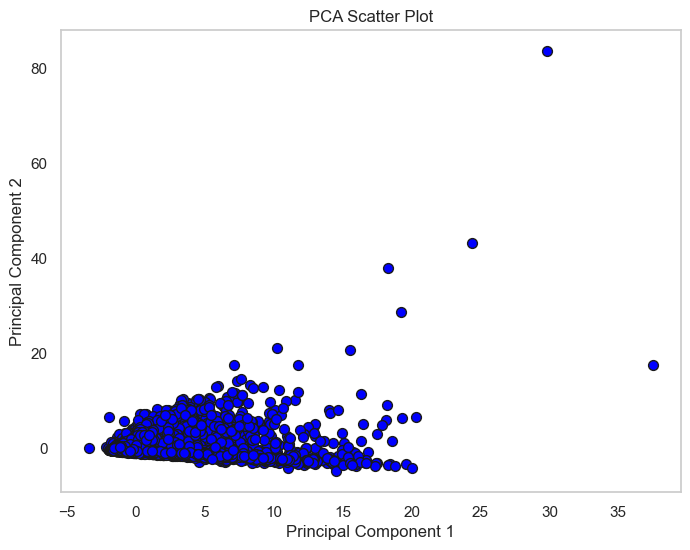

In [83]:
#Plot the PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

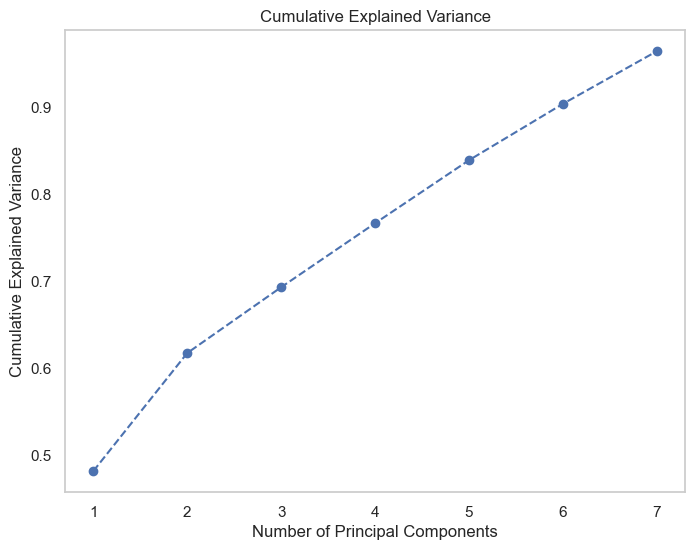

In [84]:
#Plot Cumulative Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [92]:
# Step 3: Extract PCA Loadings
loadings = pca.components_.T  # Transpose to align features with components
loadings_df = pd.DataFrame(loadings, index=scaled_cols)

# Display the PCA Loadings
print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
            0         1         2         3         4         5         6
X12  0.379023 -0.182585  0.055453  0.041915  0.056370  0.012136 -0.008498
X13  0.390456 -0.158956 -0.017924  0.079428  0.035340 -0.030774  0.136394
X14  0.395409 -0.103892 -0.057299  0.118273 -0.094972 -0.124521 -0.094369
X15  0.398511 -0.098177 -0.080057  0.022915 -0.024758  0.125597 -0.038035
X16  0.395254 -0.083493 -0.042485 -0.118114  0.084960 -0.004932 -0.048485
X17  0.387204 -0.072626  0.101122 -0.149728 -0.067262  0.015037  0.003256
X18  0.133558  0.423838 -0.365937  0.202550 -0.064926 -0.211322  0.747830
X19  0.114955  0.452653 -0.300717  0.162274 -0.433040 -0.298528 -0.585337
X20  0.125660  0.424999 -0.232270 -0.266469  0.050791  0.794968 -0.058665
X21  0.114362  0.372359  0.122377 -0.604493  0.485416 -0.436478 -0.072062
X22  0.110708  0.310862  0.761601 -0.074298 -0.493515  0.055663  0.179032
X23  0.101961  0.329049  0.318714  0.657080  0.548355  0.089521 -0.161416


In [97]:
loadings_df[[0]].sort_values(by=0, ascending=False)

0
X15  0.398511
X14  0.395409
X16  0.395254
X13  0.390456
X17  0.387204
X12  0.379023
X18  0.133558
X20  0.125660
X19  0.114955
X21  0.114362
X22  0.110708
X23  0.101961